# Adult Dataset - Predicting income classification
Predict whether income exceeds $50K/yr based on census data.  
Unbalanced Dataset  
*Data Citation:*  
*`Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.`*

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, LearningCurveDisplay, learning_curve, ValidationCurveDisplay, validation_curve, KFold
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import AdaBoostClassifier as ABC, RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
print("Pandas Version:", pd.__version__)
print("Numpy Version:", np.__version__)
print("SKLearn Version:", skl.__version__)

Pandas Version: 2.0.3
Numpy Version: 1.25.2
SKLearn Version: 1.3.0


## Data Loading and Preparation

In [3]:
col_names = ["age", "workclass", "final-weight", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "target"]
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
num_cols = ["age", "final-weight", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [4]:
RAND_STATE = 42
CV_SPLITS = 5
VERBOSE = 3
SCORING_METRIC = "accuracy"

In [5]:
df = pd.read_csv("adult.data",header=None, sep=', ')
df.columns = col_names

C:\Users\mshihab2\AppData\Local\Temp\ipykernel_21708\2333182622.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("adult.data",header=None, sep=', ')


In [6]:
df=df.replace('?',np.nan)

In [7]:
df.isnull().sum()

age                  0
workclass         1836
final-weight         0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

In [8]:
df = df.dropna().reset_index(drop = True)

In [9]:
df.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   final-weight    30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  target          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


In [11]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df.target.value_counts()

target
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
Male      20380
Female     9782
Name: count, dtype: int64

In [14]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

In [15]:
df['race'].value_counts()

race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

In [16]:
df['workclass'].value_counts()

workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64

In [17]:
df['occupation'].value_counts()

occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: count, dtype: int64

In [18]:
df['education'].value_counts()

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

In [19]:
df['native-country'].value_counts()

native-country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

## Data PairPlot

c:\Users\mshihab2\AppData\Local\anaconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


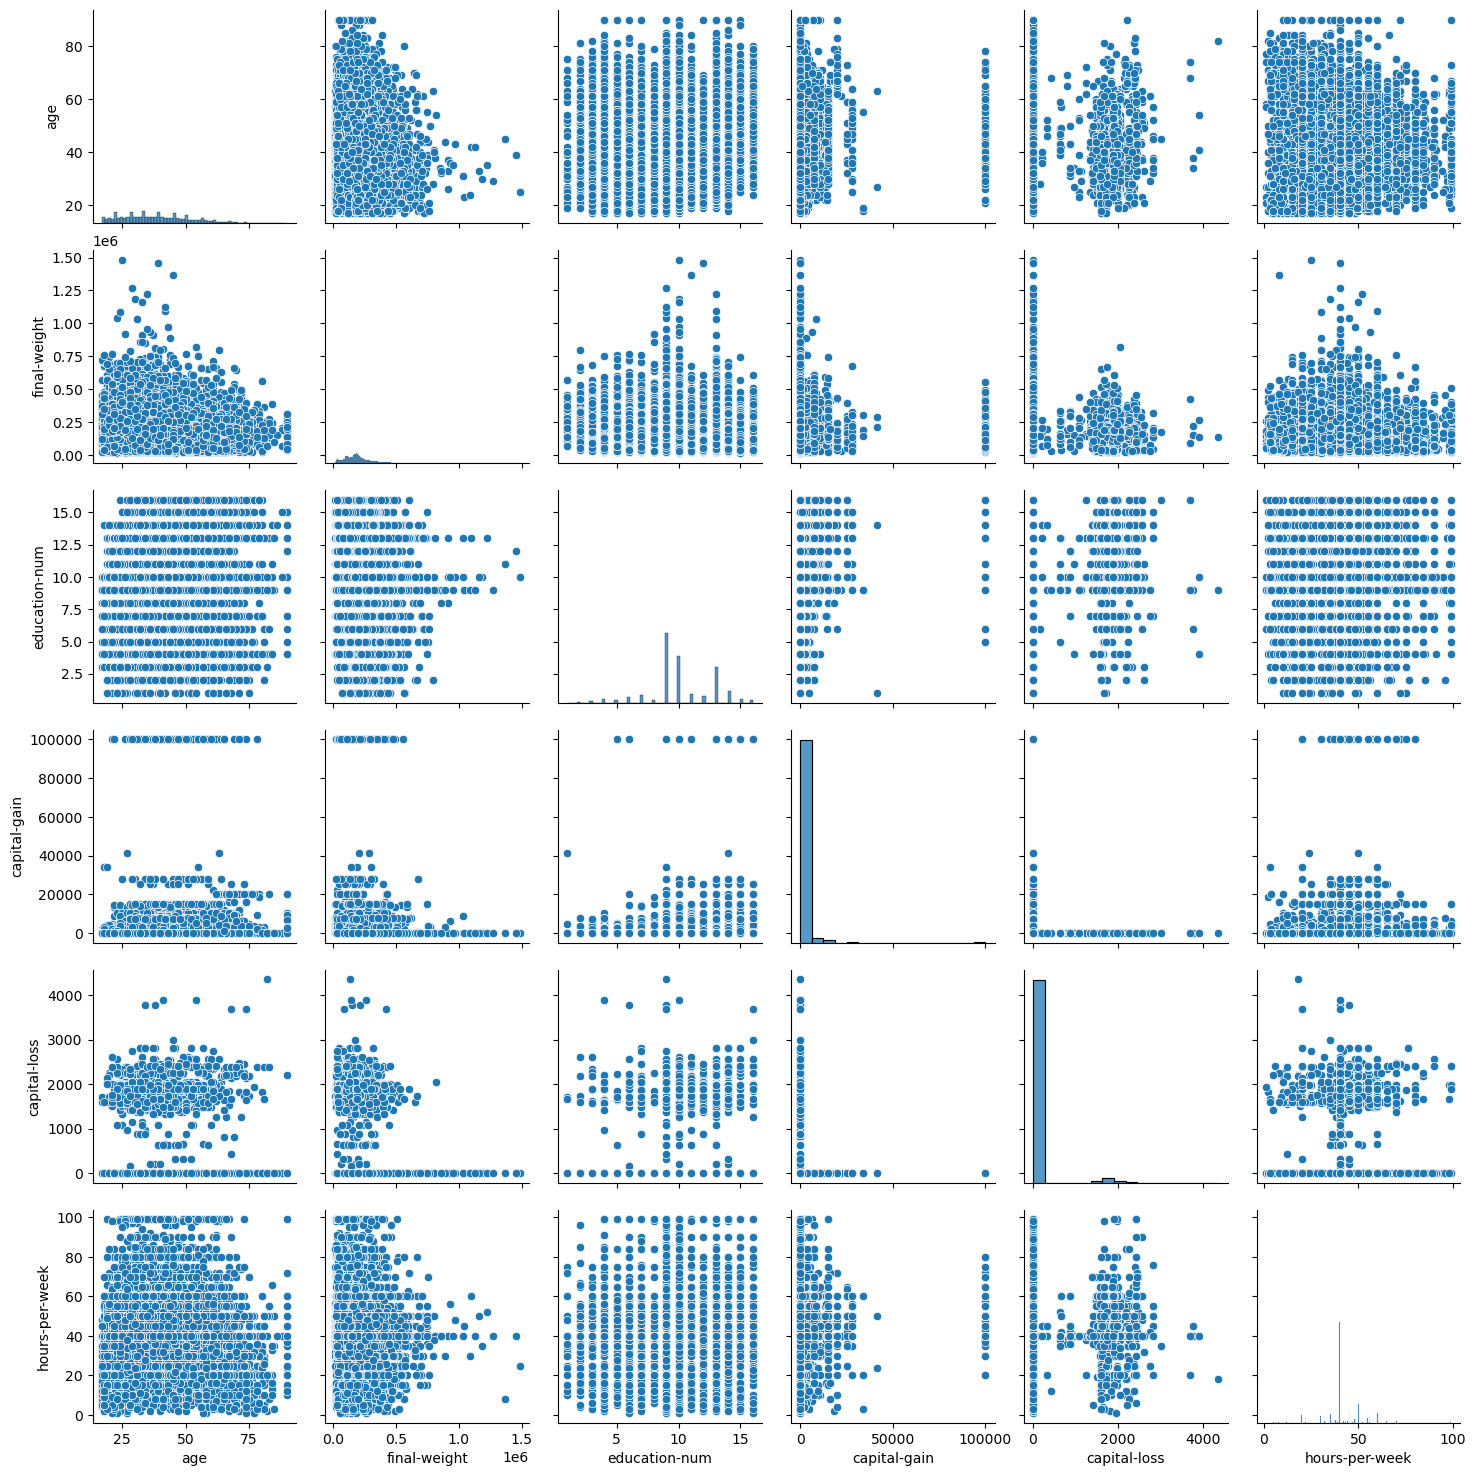

In [20]:
sns.pairplot(df)

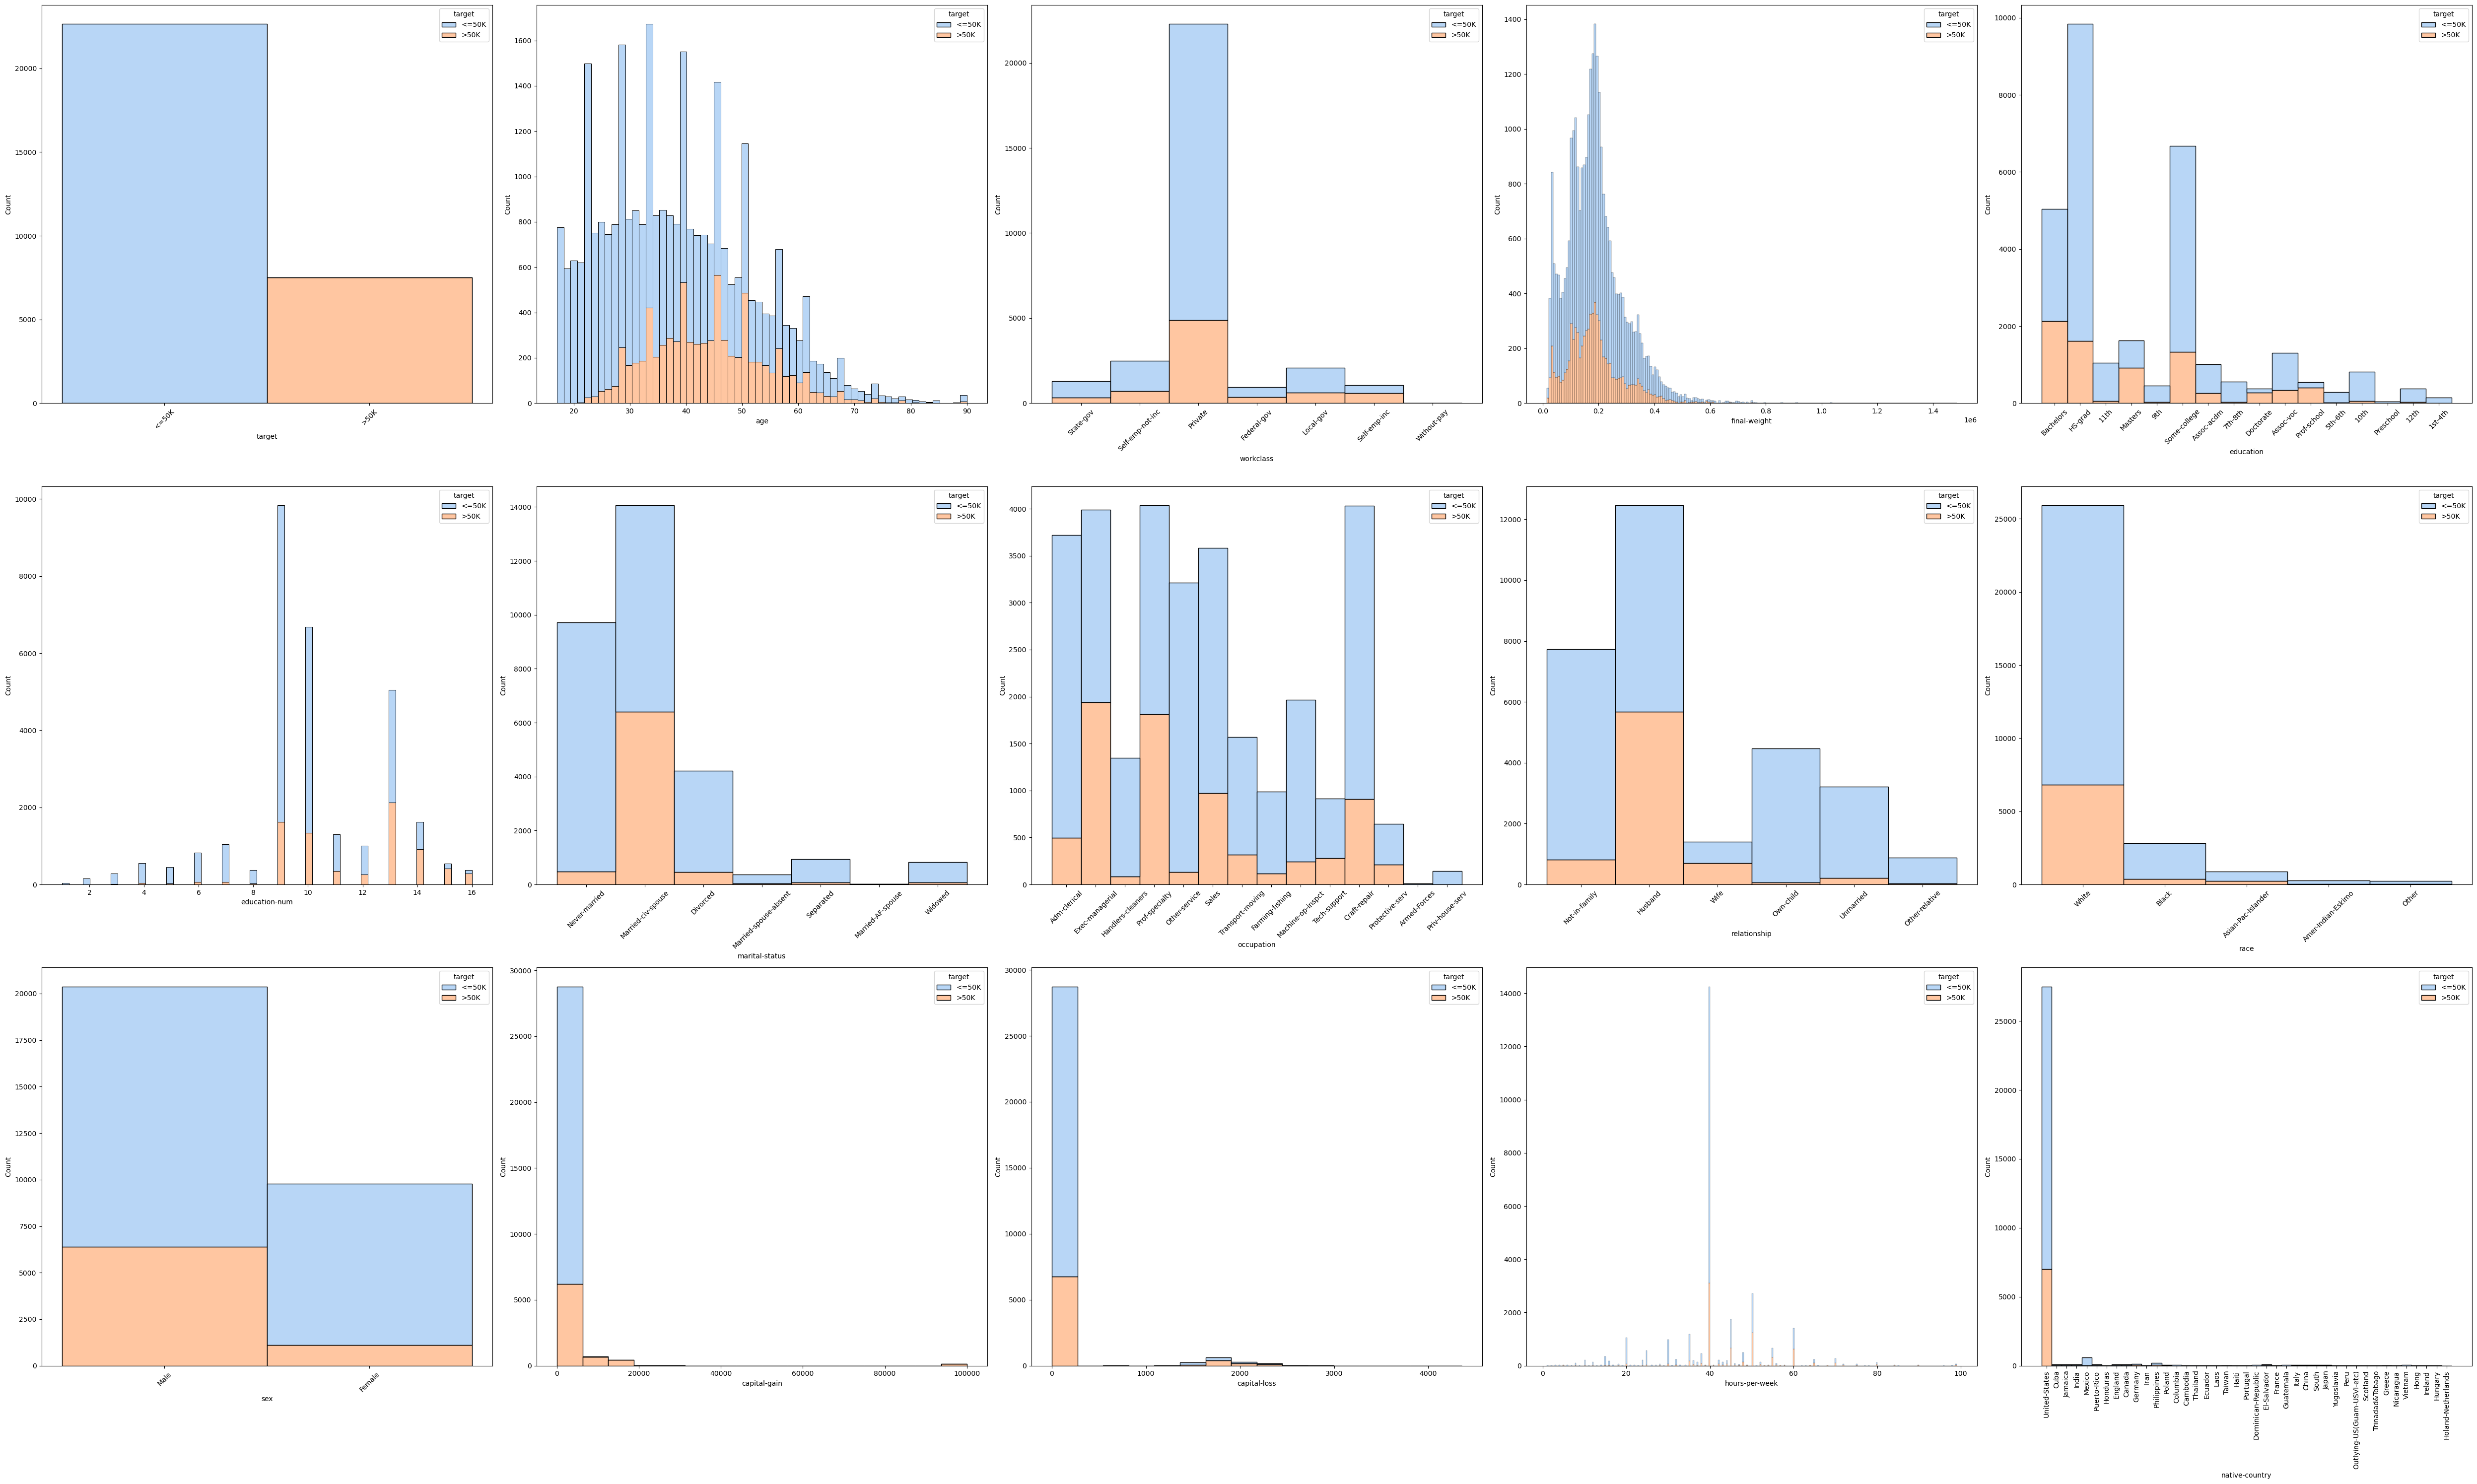

In [21]:
fig, ax = plt.subplots(3,5, figsize=(50,30))
for i,col in enumerate(df.columns):
    i=0 if col == "target" else i+1
    r,c = i//5,i%5
    a = ax[r,c]
    g = sns.histplot(data=df, x=col, hue="target", multiple="stack", palette="pastel", element="bars", ax=a)
    if df[col].dtype == 'O': a.tick_params(axis='x', rotation=45)
    if col == "native-country": a.tick_params(axis='x', rotation=90)
plt.tight_layout()

## Splitting into training and testing

In [22]:
X = df.drop(columns="target")
y = df.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RAND_STATE)

## Encoding and Scaling

In [24]:
encoders = {feature:LabelEncoder() for feature in cat_cols}

In [25]:
for feature in cat_cols:
        X_train[feature] = encoders[feature].fit_transform(X_train[feature])
        X_test[feature] = encoders[feature].transform(X_test[feature])

In [26]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [27]:
X_train.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.251098,-0.211247,-0.034810,0.176039,-0.440230,-0.397780,-0.981454,-0.890036,0.385748,0.694584,-0.149164,-0.21847,-0.081393,0.268805
1,-1.163985,-0.211247,0.031401,0.176039,-0.440230,-0.397780,-0.237710,-0.890036,0.385748,0.694584,-0.149164,-0.21847,-0.081393,0.268805
2,0.053197,-0.211247,-0.011115,-0.347037,1.126229,-0.397780,-0.733540,2.226580,0.385748,-1.439712,-0.149164,-0.21847,1.583855,0.268805
3,-0.403246,-0.211247,-0.205624,0.176039,-0.440230,-1.738725,0.258119,1.603257,0.385748,-1.439712,-0.149164,-0.21847,-0.747492,0.268805
4,-0.859689,0.836208,0.418520,0.176039,-0.440230,1.613636,-1.477283,-0.266713,0.385748,0.694584,-0.149164,-0.21847,-0.247918,0.268805


In [28]:
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

In [29]:
target_encoder.classes_

array(['<=50K', '>50K'], dtype=object)

In [30]:
target_encoder.inverse_transform([0,0,1,1])

array(['<=50K', '<=50K', '>50K', '>50K'], dtype=object)

## Model Creation and Gridsearching

In [31]:
models = {
    "knn":{
        'model':KNN(),
        'param':{
            'n_neighbors':list(range(3,10,2)), 
            'p': [1, 2],
        },
    },
    "abc":{
        'model': ABC(random_state = RAND_STATE),
        'param':{
            'n_estimators': [50, 100, 150, 300],
        },
    },
    "dtc":{
        'model': DTC(random_state = RAND_STATE),
        'param':{
            'criterion': ['gini', 'entropy', 'log_loss'], 
            "max_depth": [None,]+list(range(2,10)),
            "min_samples_split": list(range(2,6,1)),
            "min_samples_leaf":list(range(1,6,1)),
        },
    },
    "svc":{
        'model': SVC(random_state = RAND_STATE),
        'param': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [3,4,5],
        },
    },
}

for name, mdic in models.items():
    model = mdic['model']
    param = mdic['param']
    print(model,param)
    mdic['gs'] = GridSearchCV(estimator = model, param_grid = param, cv = CV_SPLITS, scoring = SCORING_METRIC, n_jobs = -1, return_train_score = True, verbose=VERBOSE)
    mdic['gs'].fit(X_train, y_train)
    mdic['y_pred'] = mdic['gs'].best_estimator_.predict(X_test)
    print(mdic['gs'].best_estimator_)
    print(classification_report(y_test, mdic['y_pred']))


KNeighborsClassifier() {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}
Fitting 5 folds for each of 8 candidates, totalling 40 fits


KNeighborsClassifier(n_neighbors=9, p=1)
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6767
           1       0.71      0.59      0.65      2282

    accuracy                           0.84      9049
   macro avg       0.79      0.76      0.77      9049
weighted avg       0.83      0.84      0.83      9049

AdaBoostClassifier(random_state=42) {'n_estimators': [50, 100, 150, 300]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
AdaBoostClassifier(n_estimators=300, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6767
           1       0.79      0.64      0.70      2282

    accuracy                           0.87      9049
   macro avg       0.84      0.79      0.81      9049
weighted avg       0.86      0.87      0.86      9049

DecisionTreeClassifier(random_state=42) {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [None, 2, 3, 4, 5

## Model Evaluation

KNeighborsClassifier(n_neighbors=9, p=1)
AdaBoostClassifier(n_estimators=300, random_state=42)
DecisionTreeClassifier(max_depth=8, random_state=42)
SVC(random_state=42)


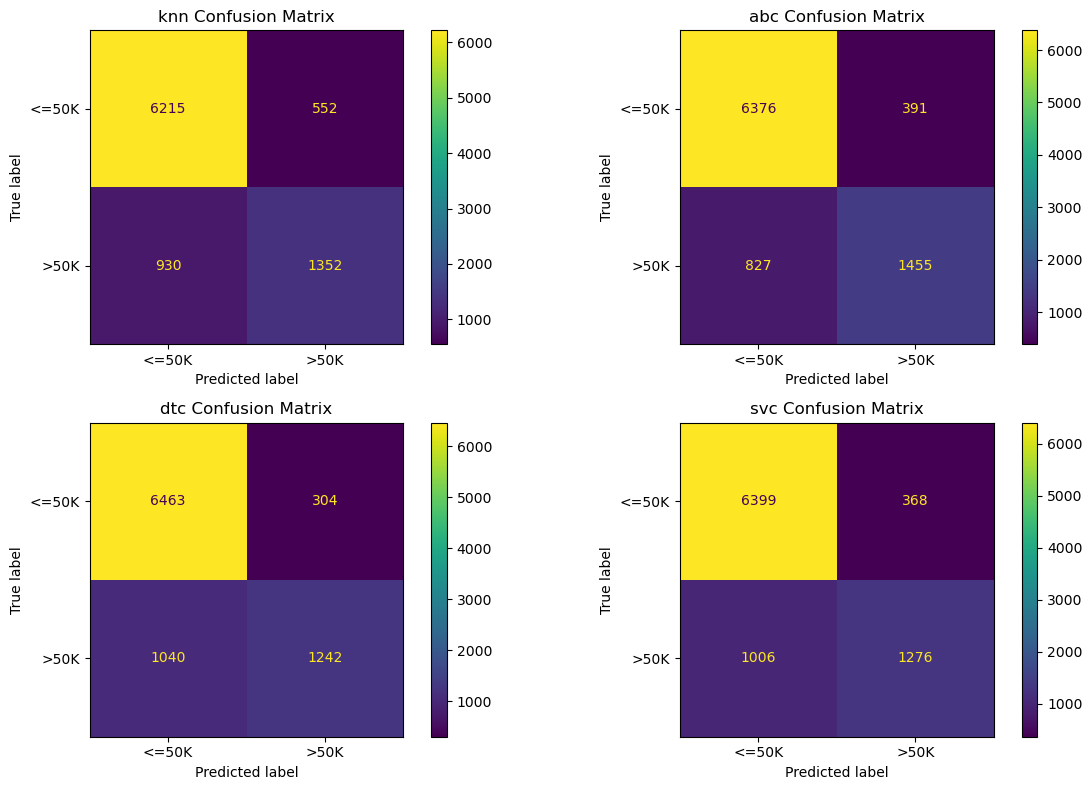

In [32]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12, 8))
axs = [ax0,ax1,ax2,ax3]
for i, (name, mdic) in enumerate(models.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.show()

It seems as the imbalance of classes is affecting the predictive quality of the model, despite having an accuracy of ~85  
For now let's see the rest of the plots

In [33]:
X_curve = pd.concat([X_train,X_test])
y_curve = np.append(y_train,y_test)

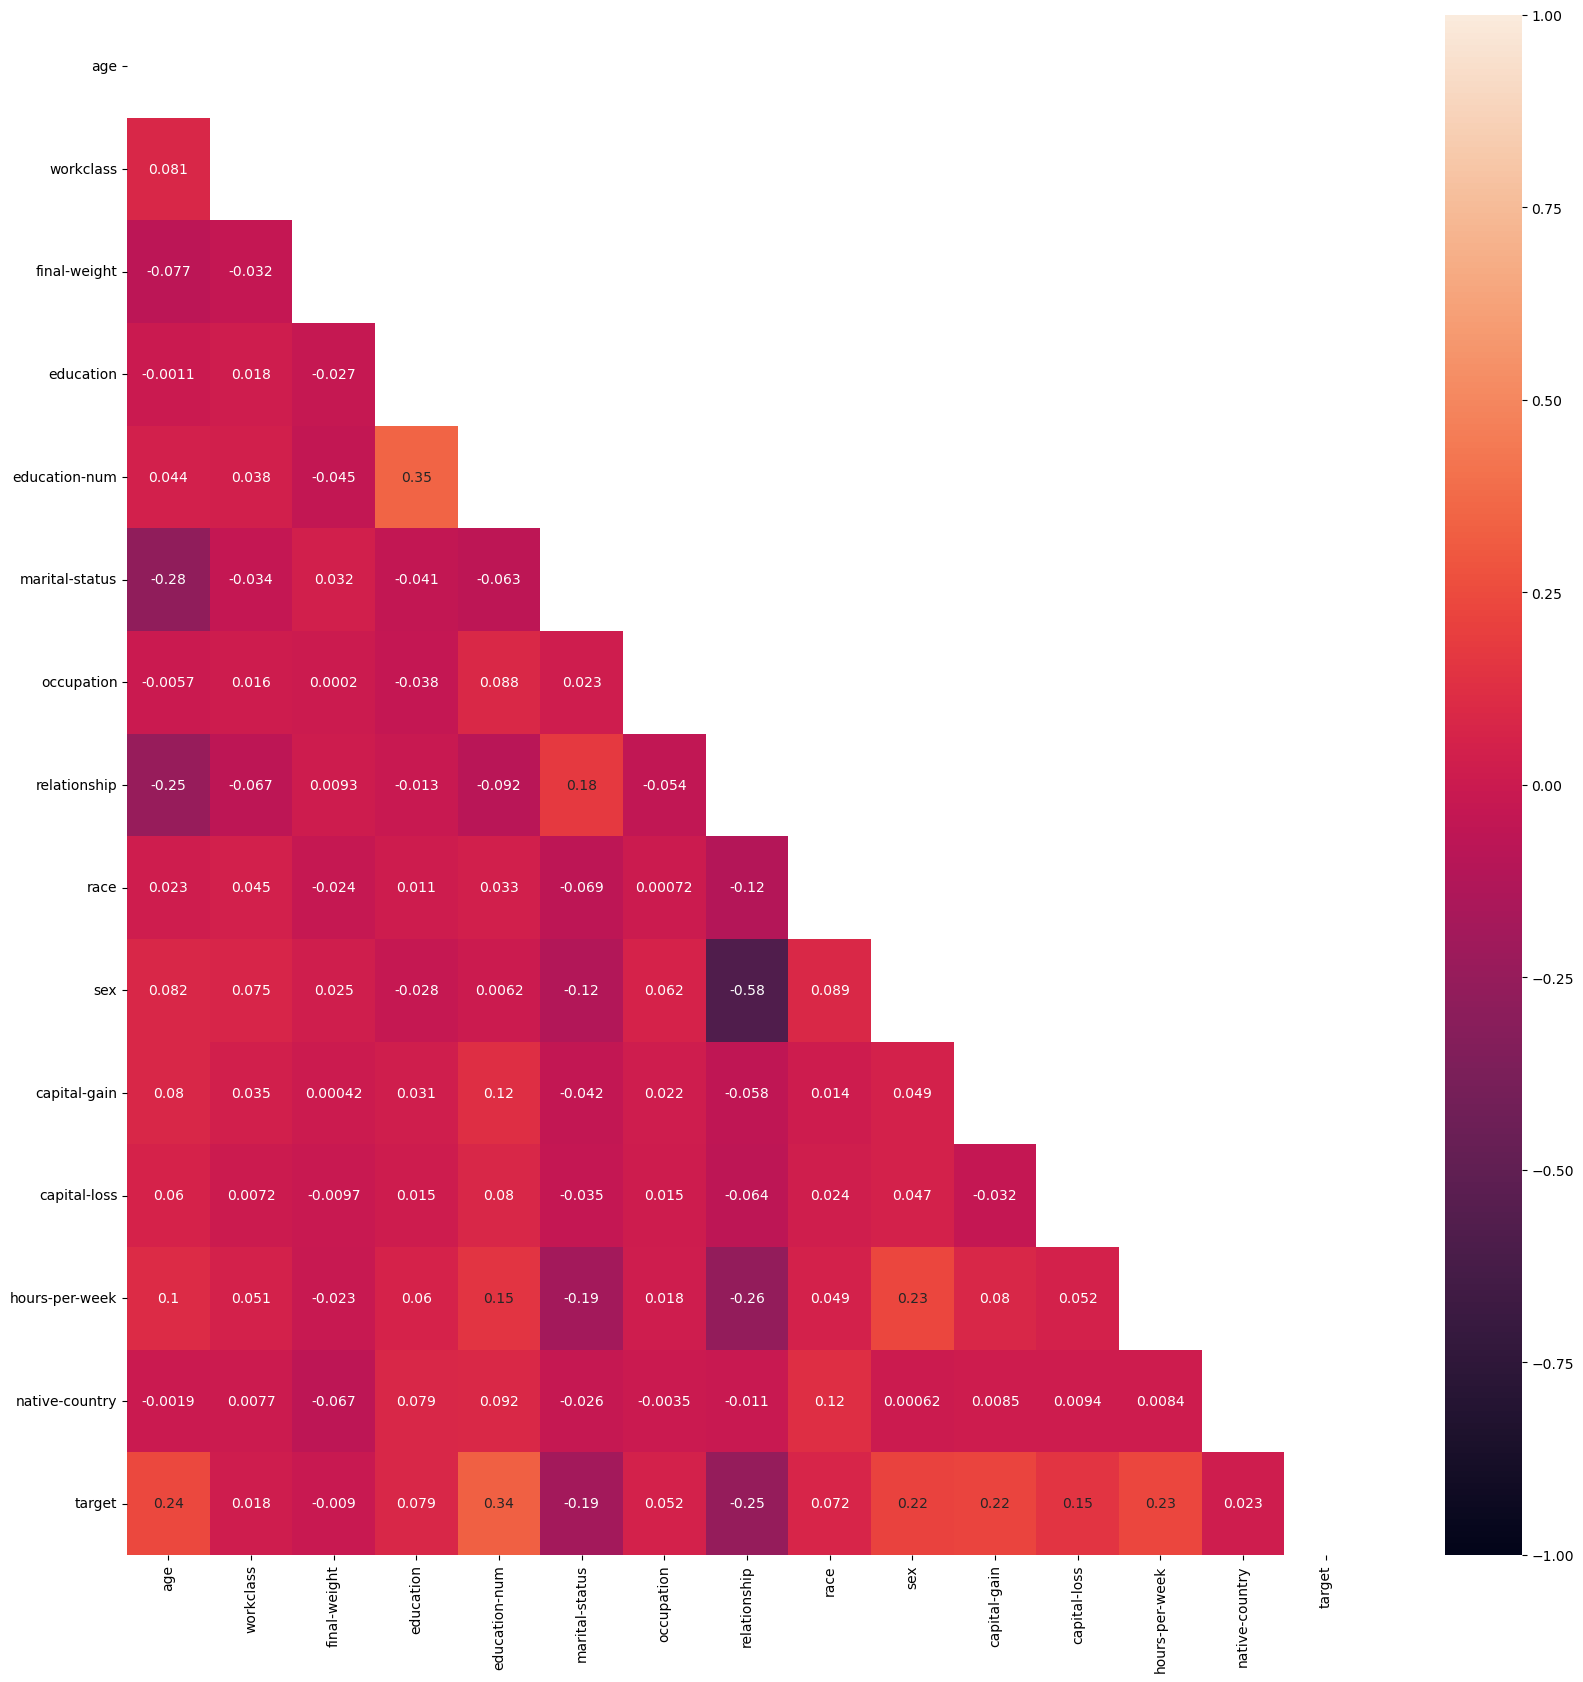

In [164]:
corr = X_curve.copy()
corr['target'] = y_curve
corr = corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax = plt.subplots(figsize=(20,20))
g = sns.heatmap(corr, annot=True, mask=mask)
g.collections[0].set_clim(-1,1)

In [34]:
lc_common_params = {
    "X": X_curve,
    "y": y_curve,
    "train_sizes": np.linspace(0.1, 1.0, 19),
    "cv": KFold(n_splits=CV_SPLITS),
    "n_jobs": 4,
    "return_times": True,
}

for name, mdic in models.items():
    model = mdic['gs'].best_estimator_
    print(name, model)
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(model, **lc_common_params)
    mdic['lc'] = {
        'train_sizes':train_sizes,
        'train_scores':train_scores,
        'test_scores':test_scores,
        'fit_times':fit_times,
        'score_times':score_times
    }


knn KNeighborsClassifier(n_neighbors=9, p=1)
abc AdaBoostClassifier(n_estimators=300, random_state=42)
dtc DecisionTreeClassifier(max_depth=8, random_state=42)
svc SVC(random_state=42)


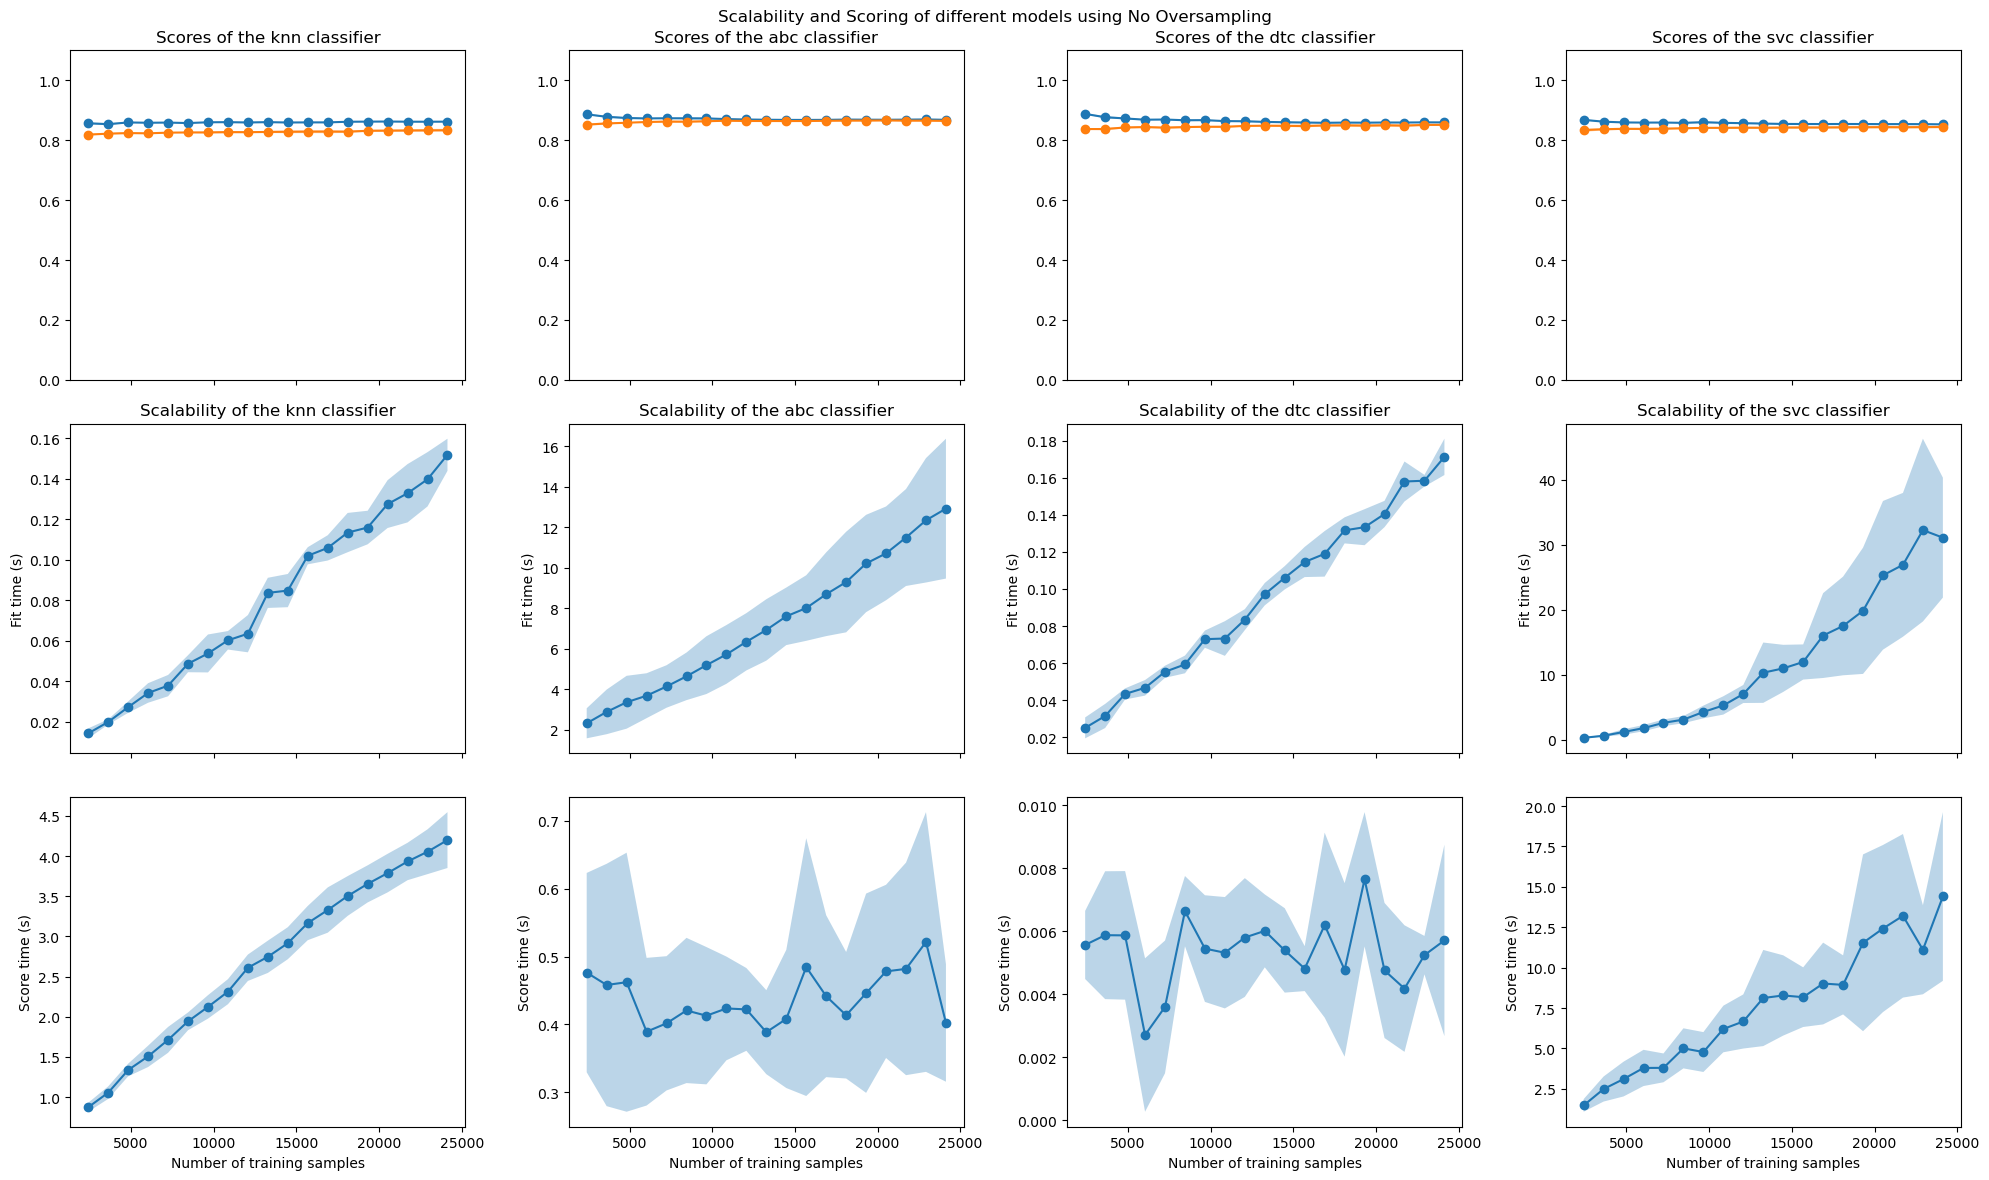

In [35]:
fig, ((ax00,ax01,ax02,ax03),(ax10,ax11,ax12,ax13),(ax20,ax21,ax22,ax23)) = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), sharex=True)
axs = [(ax00,ax01,ax02,ax03),(ax10,ax11,ax12,ax13),(ax20,ax21,ax22,ax23)]
plt.suptitle("Scalability and Scoring of different models using No Oversampling")

for i, (name, mdic) in enumerate(models.items()):
    lc_data = mdic['lc']
    
    axs[0][i].plot(lc_data['train_sizes'], lc_data['train_scores'].mean(axis=1), "o-")
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['train_scores'].mean(axis=1) - lc_data['train_scores'].std(axis=1),
        lc_data['train_scores'].mean(axis=1) + lc_data['train_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].plot(lc_data['train_sizes'], lc_data['test_scores'].mean(axis=1), "o-")
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['test_scores'].mean(axis=1) - lc_data['test_scores'].std(axis=1),
        lc_data['test_scores'].mean(axis=1) + lc_data['test_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].set_title(
        f"Scores of the {name} classifier"
    )
    axs[0][i].set_ylim(0,1.1)

    axs[1][i].plot(lc_data['train_sizes'], lc_data['fit_times'].mean(axis=1), "o-")
    axs[1][i].fill_between(
        lc_data['train_sizes'],
        lc_data['fit_times'].mean(axis=1) - lc_data['fit_times'].std(axis=1),
        lc_data['fit_times'].mean(axis=1) + lc_data['fit_times'].std(axis=1),
        alpha=0.3,
    )
    axs[1][i].set_ylabel("Fit time (s)")
    axs[1][i].set_title(
        f"Scalability of the {name} classifier"
    )

    axs[2][i].plot(lc_data["train_sizes"], lc_data["score_times"].mean(axis=1), "o-")
    axs[2][i].fill_between(
        lc_data["train_sizes"],
        lc_data["score_times"].mean(axis=1) - lc_data["score_times"].std(axis=1),
        lc_data["score_times"].mean(axis=1) + lc_data["score_times"].std(axis=1),
        alpha=0.3,
    )
    axs[2][i].set_ylabel("Score time (s)")
    axs[2][i].set_xlabel("Number of training samples")
plt.tight_layout()
plt.show()

In [36]:
vc_common_params = {
    "X": X_curve,
    "y": y_curve,
    "cv": KFold(n_splits=CV_SPLITS),
    "n_jobs":-2
}

for name, items in models.items():
    model = items['model']
    param = items['param']
    vc = dict()
    for param_name, param_range in param.items():
        if None in param_range:
            param_range.remove(None)
        train_score, test_score = validation_curve(estimator = model, param_name = param_name, param_range=param_range, **vc_common_params)
        vc[param_name] = {
            'train_score':train_score,
            'test_score':test_score
        }
        print(name)
        print(param_name, param_range)
    items['vc']=vc

knn
n_neighbors [3, 5, 7, 9]
knn
p [1, 2]
abc
n_estimators [50, 100, 150, 300]
dtc
criterion ['gini', 'entropy', 'log_loss']
dtc
max_depth [2, 3, 4, 5, 6, 7, 8, 9]
dtc
min_samples_split [2, 3, 4, 5]
dtc
min_samples_leaf [1, 2, 3, 4, 5]
svc
kernel ['linear', 'poly', 'rbf', 'sigmoid']
svc
degree [3, 4, 5]


[3, 5, 7, 9] 4
[1, 2] 2
[50, 100, 150, 300] 4
['gini', 'entropy', 'log_loss'] 3
[2, 3, 4, 5, 6, 7, 8, 9] 8
[2, 3, 4, 5] 4
[1, 2, 3, 4, 5] 5
['linear', 'poly', 'rbf', 'sigmoid'] 4
[3, 4, 5] 3


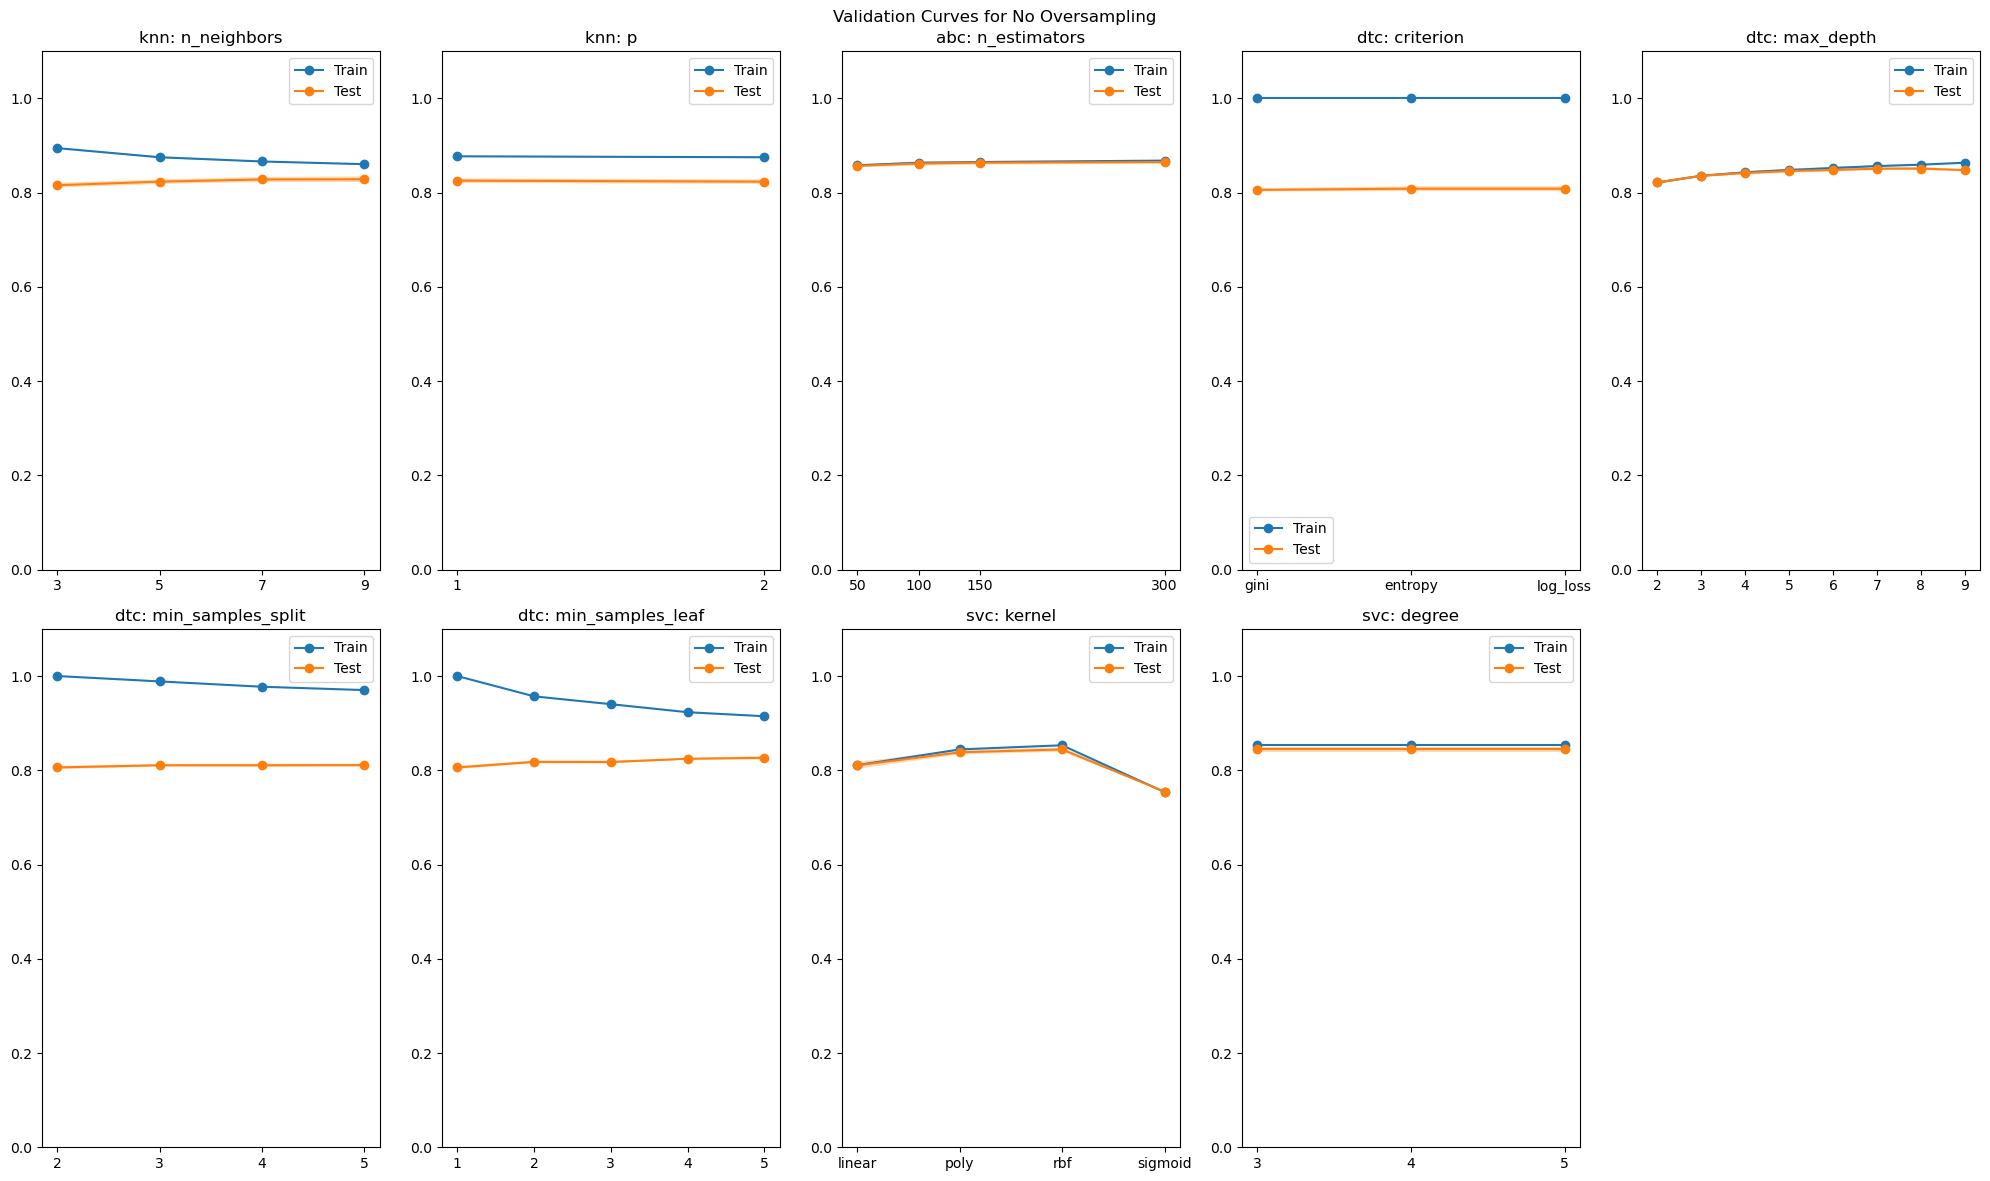

In [37]:
counter = 0
fig, ((ax0,ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8,ax9)) = plt.subplots(nrows=2,ncols=5, figsize=(20, 12))
axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
axs[-1].axis('off')
for name, items in models.items():
    model = items['model']
    params = items["param"]
    vc_data = items['vc']
    for param_name, results in vc_data.items():
        print(params[param_name],len(results['train_score'].mean(axis=1)))
        axs[counter].plot(params[param_name], results['train_score'].mean(axis=1), "o-", label = "Train")
        axs[counter].fill_between(
            params[param_name],
            results['train_score'].mean(axis=1) - results['train_score'].std(axis=1),
            results['train_score'].mean(axis=1) + results['train_score'].std(axis=1),
            alpha=0.3,
        )

        axs[counter].plot(params[param_name], results['test_score'].mean(axis=1), "o-", label = "Test")
        axs[counter].fill_between(
            params[param_name],
            results['test_score'].mean(axis=1) - results['test_score'].std(axis=1),
            results['test_score'].mean(axis=1) + results['test_score'].std(axis=1),
            alpha=0.3,
        )

        if param_name not in ['criterion','kernel']:
            axs[counter].set_xticks(params[param_name])

        axs[counter].legend()
        axs[counter].set_ylim(0,1.1)
        axs[counter].set_title(f"{name}: {param_name}")
        counter+=1
plt.suptitle("Validation Curves for No Oversampling")
plt.tight_layout()


## Balancing the Data
Let's use the SMOTE Technique. [This article](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#Resampling_Techniques_to_Solve_Class_Imbalance) has a nice simple explanation:
> SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
>
>SMOTE algorithm works in 4 simple steps:
>1. Choose a minority class as the input vector.
>2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function).
>3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor.
>4. Repeat the steps until the data is balanced.


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE() # By default, k_neighbors=5

In [40]:
x_smote, y_smote = smote.fit_resample(X_curve,y_curve)

In [41]:
np.unique(y_smote, return_counts = True)

(array([0, 1]), array([22654, 22654], dtype=int64))

In [42]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = RAND_STATE)

In [43]:
smodels = {
    "knn":{
        'model':KNN(),
        'param':{
            'n_neighbors':list(range(3,10,2)), 
            'p': [1, 2],
        },
    },
    "abc":{
        'model': ABC(random_state = RAND_STATE),
        'param':{
            'n_estimators': [50, 100, 150, 300],
        },
    },
    "dtc":{
        'model': DTC(random_state = RAND_STATE),
        'param':{
            'criterion': ['gini', 'entropy', 'log_loss'], 
            "max_depth": [None,]+list(range(2,10)),
            "min_samples_split": list(range(2,6,1)),
            "min_samples_leaf":list(range(1,6,1)),
        },
    },
    "svc":{
        'model': SVC(random_state = RAND_STATE),
        'param': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [3,4,5],
        },
    },
}

for name, mdic in smodels.items():
    model = mdic['model']
    param = mdic['param']
    print(model,param)
    mdic['gs'] = GridSearchCV(estimator = model, param_grid = param, cv = CV_SPLITS, scoring = SCORING_METRIC, n_jobs = -1, return_train_score = True, verbose=VERBOSE)
    mdic['gs'].fit(Xs_train, ys_train)
    mdic['y_pred'] = mdic['gs'].best_estimator_.predict(Xs_test)
    print(mdic['gs'].best_estimator_)
    print(classification_report(ys_test, mdic['y_pred']))


KNeighborsClassifier() {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}


Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNeighborsClassifier(n_neighbors=3, p=1)
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      6782
           1       0.83      0.93      0.88      6811

    accuracy                           0.87     13593
   macro avg       0.87      0.87      0.87     13593
weighted avg       0.87      0.87      0.87     13593

AdaBoostClassifier(random_state=42) {'n_estimators': [50, 100, 150, 300]}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
AdaBoostClassifier(n_estimators=300, random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6782
           1       0.86      0.88      0.87      6811

    accuracy                           0.87     13593
   macro avg       0.87      0.87      0.87     13593
weighted avg       0.87      0.87      0.87     13593

DecisionTreeClassifier(random_state=42) {'criterion': ['g

While the accuracy didn't change much, there is a clear improvement in the precision and recall for the under-balanced class

KNeighborsClassifier(n_neighbors=3, p=1)
AdaBoostClassifier(n_estimators=300, random_state=42)
DecisionTreeClassifier(criterion='entropy', random_state=42)
SVC(random_state=42)
KNeighborsClassifier(n_neighbors=3, p=1)
AdaBoostClassifier(n_estimators=300, random_state=42)
DecisionTreeClassifier(criterion='entropy', random_state=42)
SVC(random_state=42)


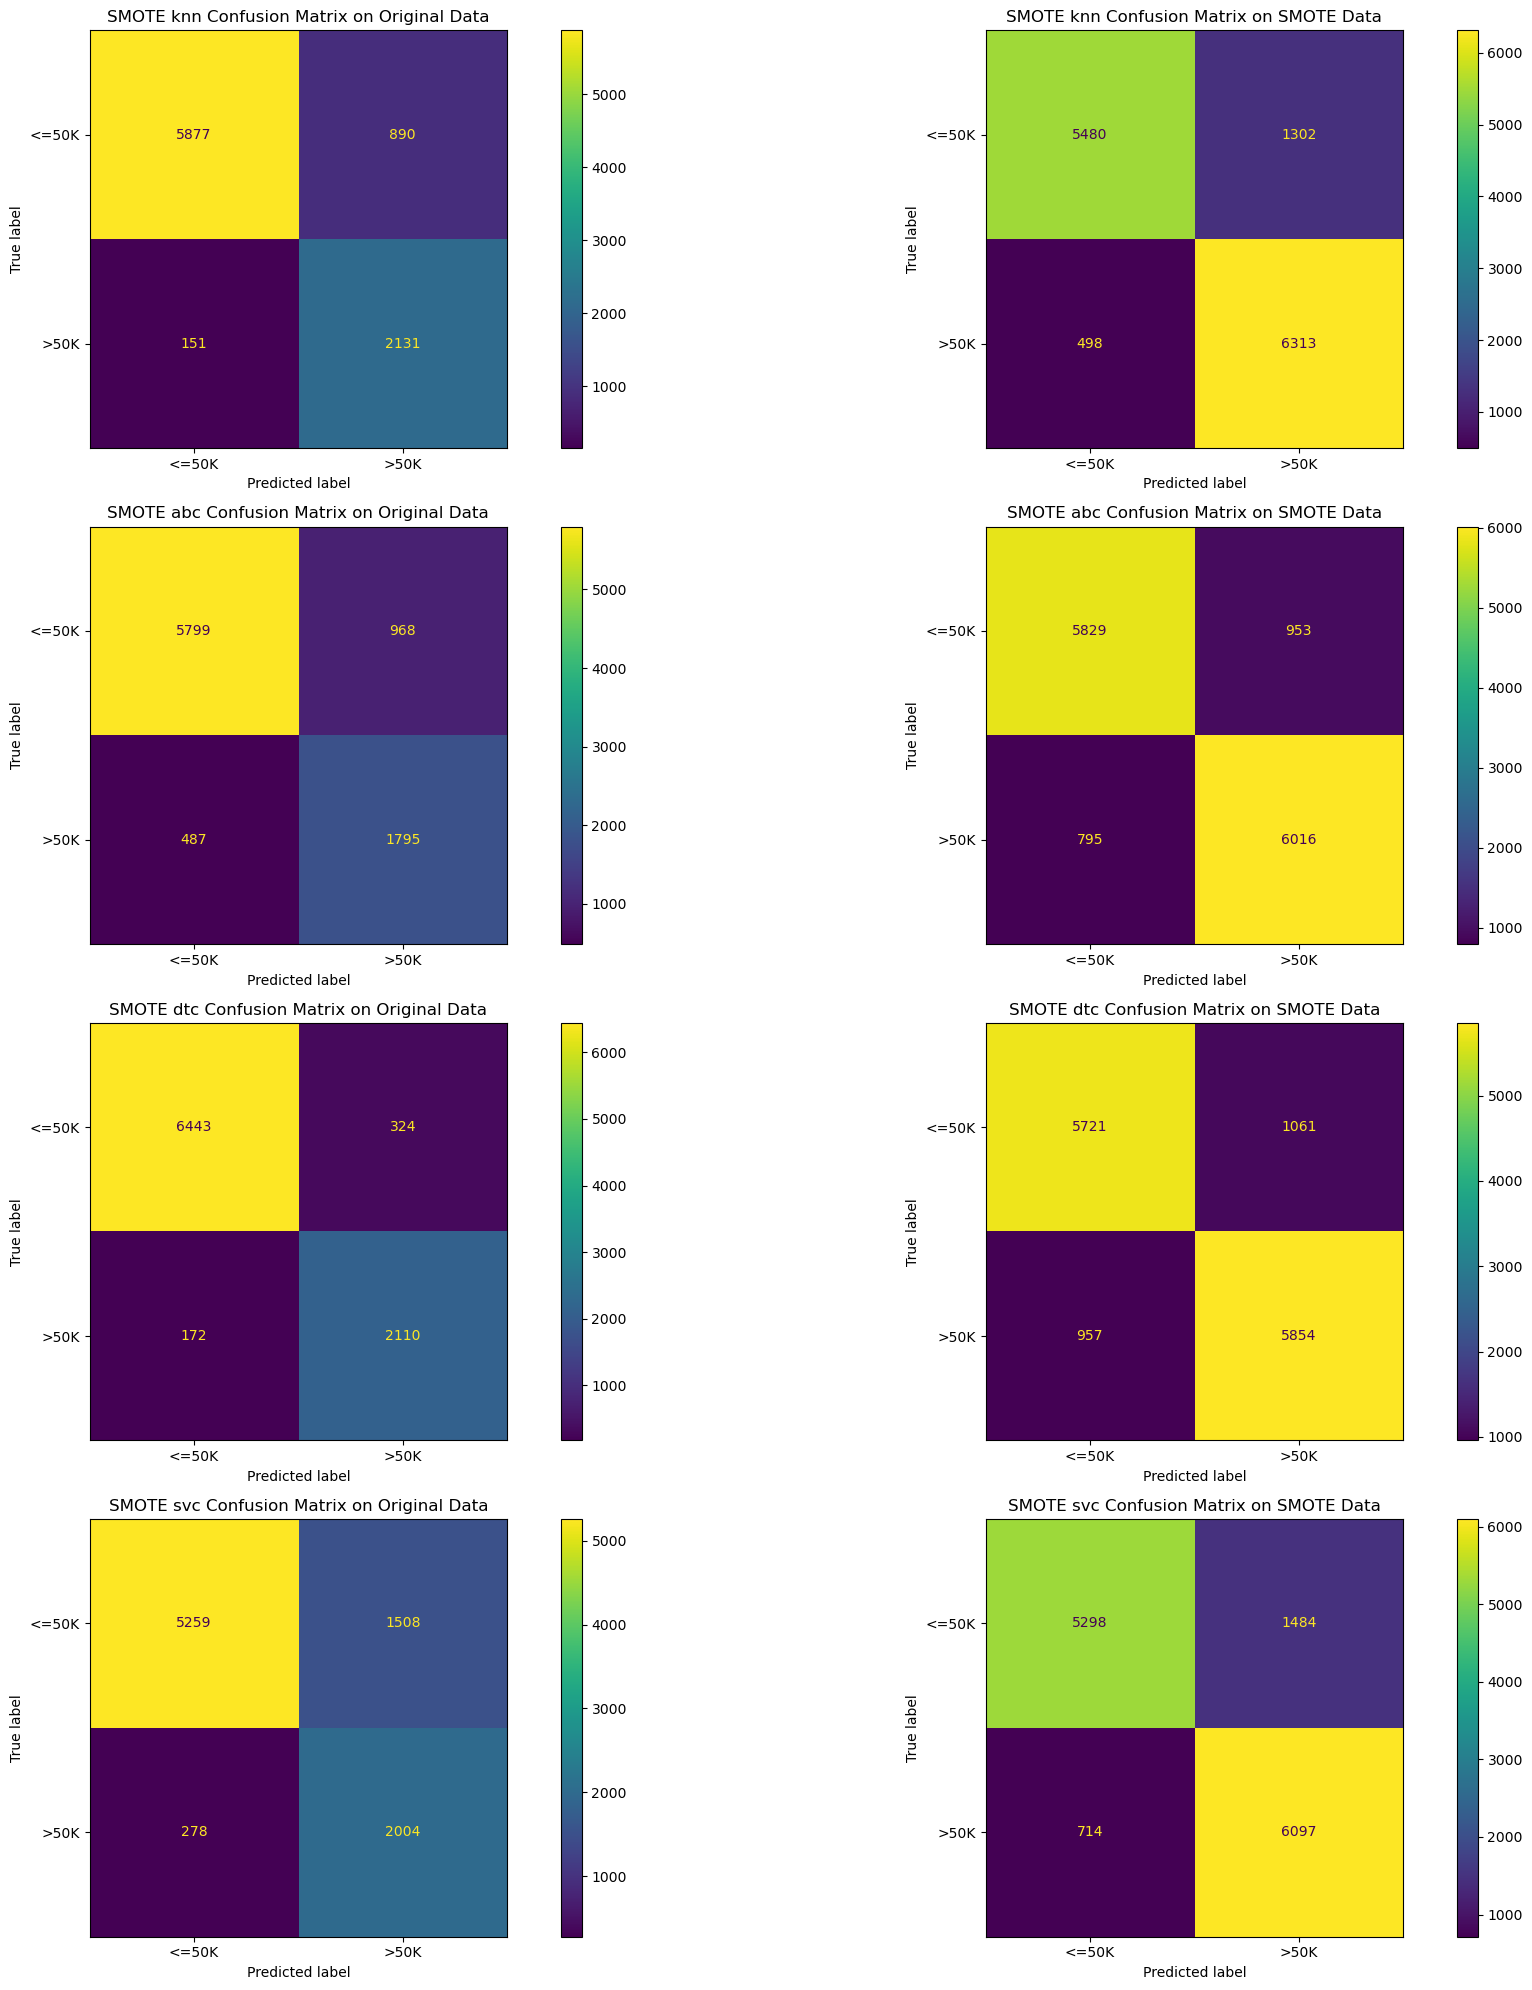

In [44]:
fig, ((ax00, ax01), (ax10, ax11), (ax20, ax21), (ax30, ax31)) = plt.subplots(4, 2, figsize=(20, 20))
axs = [ax00,ax10,ax20,ax30]
for i, (name, mdic) in enumerate(smodels.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"SMOTE {name} Confusion Matrix on Original Data")

axs = [ax01,ax11,ax21,ax31]
for i, (name, mdic) in enumerate(smodels.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, Xs_test, ys_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"SMOTE {name} Confusion Matrix on SMOTE Data")
plt.tight_layout()
plt.show()


In [45]:
Xs_curve = pd.concat([Xs_train,Xs_test])
ys_curve = np.append(ys_train,ys_test)

lcs_common_params = {
    "X": Xs_curve,
    "y": ys_curve,
    "train_sizes": np.linspace(0.1, 1.0, 19),
    "cv": KFold(n_splits=CV_SPLITS),
    "n_jobs": 4,
    "return_times": True,
}

for name, mdic in smodels.items():
    model = mdic['gs'].best_estimator_
    print(name, model)
    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(model, **lcs_common_params)
    mdic['lc'] = {
        'train_sizes':train_sizes,
        'train_scores':train_scores,
        'test_scores':test_scores,
        'fit_times':fit_times,
        'score_times':score_times
    }

knn KNeighborsClassifier(n_neighbors=3, p=1)
abc AdaBoostClassifier(n_estimators=300, random_state=42)
dtc DecisionTreeClassifier(criterion='entropy', random_state=42)
svc SVC(random_state=42)


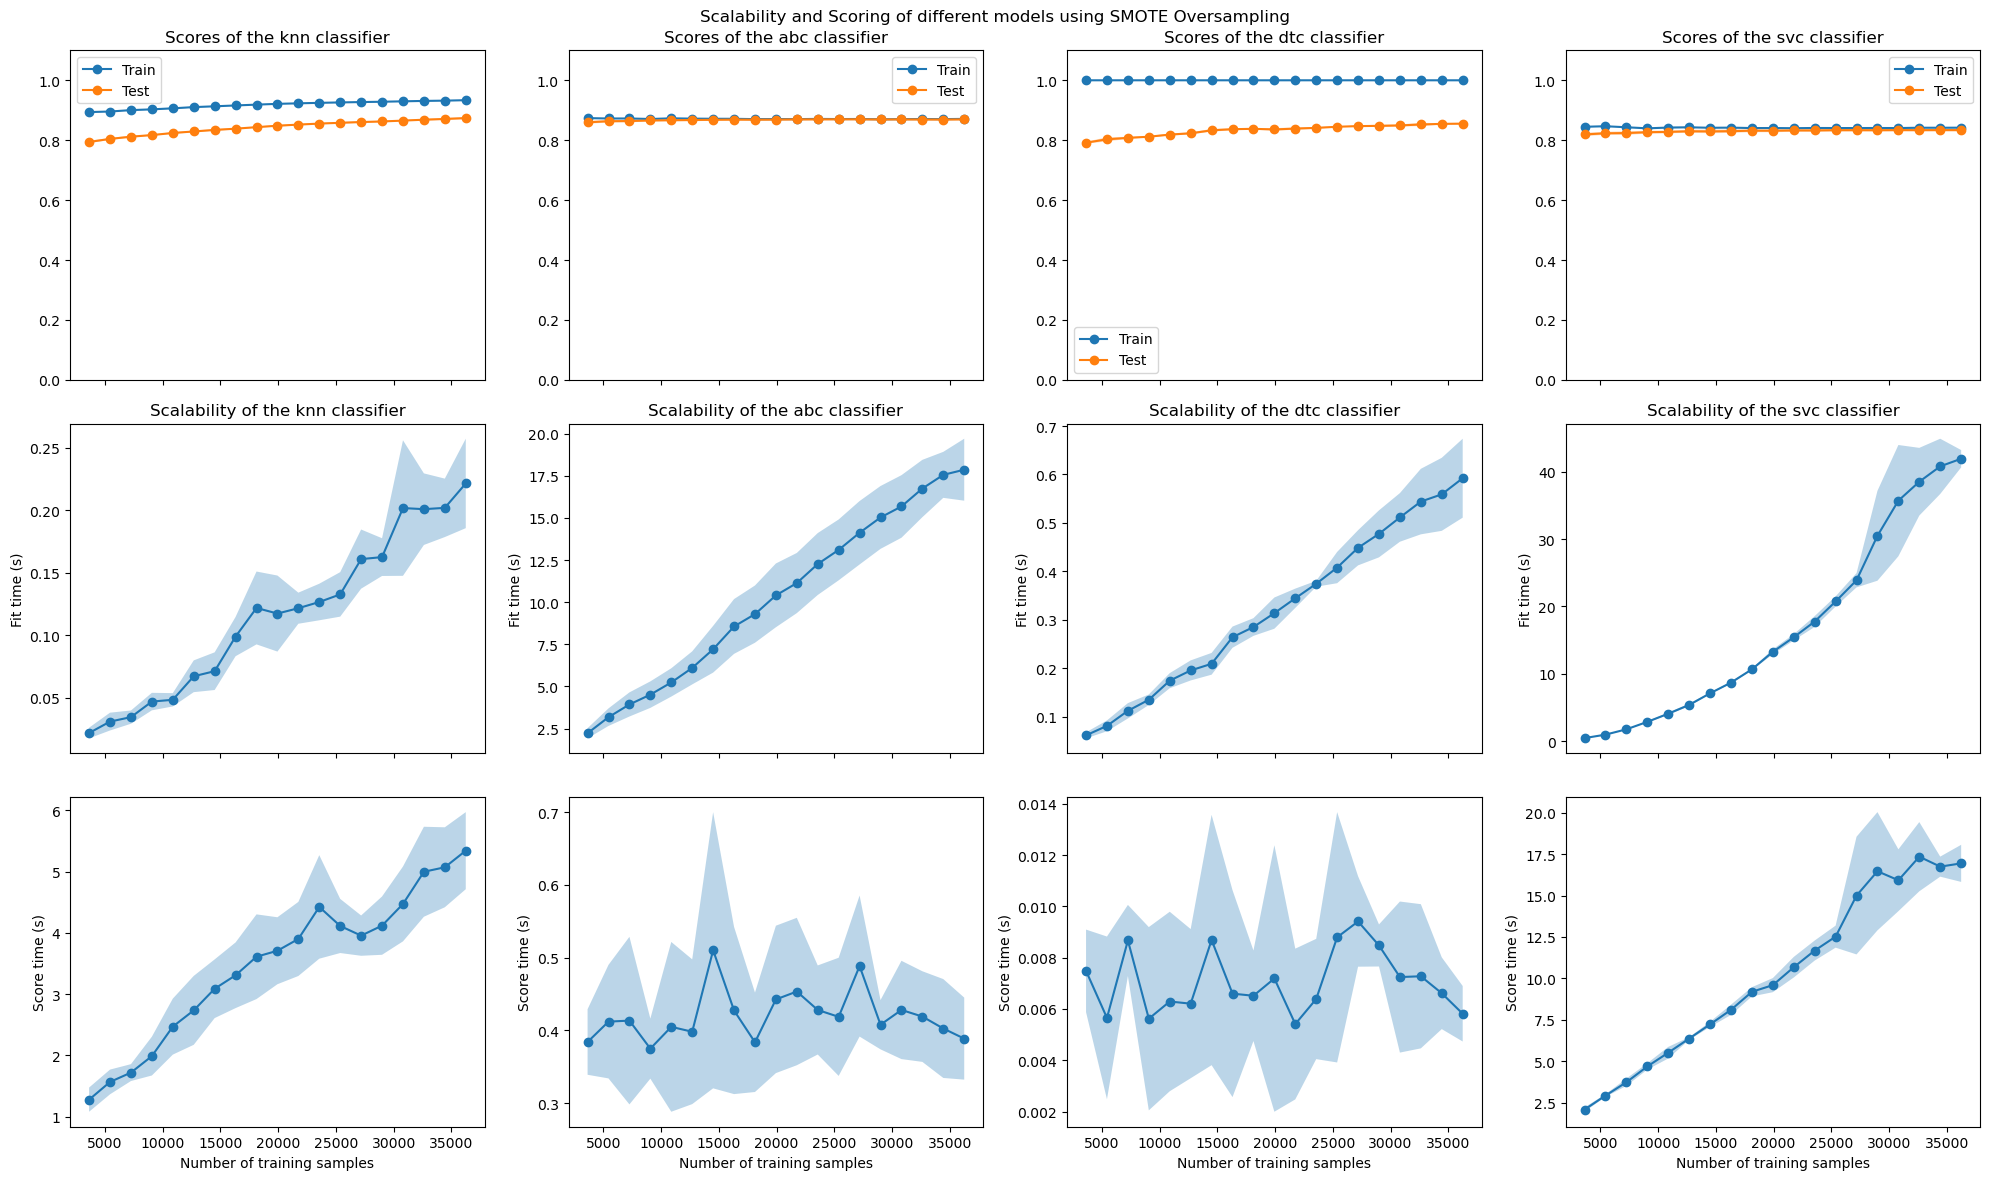

In [46]:
fig, ((ax00,ax01,ax02,ax03),(ax10,ax11,ax12,ax13),(ax20,ax21,ax22,ax23)) = plt.subplots(nrows=3, ncols=4, figsize=(20, 12), sharex=True)
axs = [(ax00,ax01,ax02,ax03),(ax10,ax11,ax12,ax13),(ax20,ax21,ax22,ax23)]
plt.suptitle("Scalability and Scoring of different models using SMOTE Oversampling")

for i, (name, mdic) in enumerate(smodels.items()):
    lc_data = mdic['lc']
    
    axs[0][i].plot(lc_data['train_sizes'], lc_data['train_scores'].mean(axis=1), "o-", label='Train')
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['train_scores'].mean(axis=1) - lc_data['train_scores'].std(axis=1),
        lc_data['train_scores'].mean(axis=1) + lc_data['train_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].plot(lc_data['train_sizes'], lc_data['test_scores'].mean(axis=1), "o-", label='Test')
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['test_scores'].mean(axis=1) - lc_data['test_scores'].std(axis=1),
        lc_data['test_scores'].mean(axis=1) + lc_data['test_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].set_title(
        f"Scores of the {name} classifier"
    )
    axs[0][i].legend()
    axs[0][i].set_ylim(0,1.1)

    axs[1][i].plot(lc_data['train_sizes'], lc_data['fit_times'].mean(axis=1), "o-")
    axs[1][i].fill_between(
        lc_data['train_sizes'],
        lc_data['fit_times'].mean(axis=1) - lc_data['fit_times'].std(axis=1),
        lc_data['fit_times'].mean(axis=1) + lc_data['fit_times'].std(axis=1),
        alpha=0.3,
    )
    axs[1][i].set_ylabel("Fit time (s)")
    axs[1][i].set_title(
        f"Scalability of the {name} classifier"
    )

    axs[2][i].plot(lc_data["train_sizes"], lc_data["score_times"].mean(axis=1), "o-")
    axs[2][i].fill_between(
        lc_data["train_sizes"],
        lc_data["score_times"].mean(axis=1) - lc_data["score_times"].std(axis=1),
        lc_data["score_times"].mean(axis=1) + lc_data["score_times"].std(axis=1),
        alpha=0.3,
    )
    axs[2][i].set_ylabel("Score time (s)")
    axs[2][i].set_xlabel("Number of training samples")
plt.tight_layout()
plt.show()

In [47]:
vcs_common_params = {
    "X": Xs_curve,
    "y": ys_curve,
    "cv": KFold(n_splits=CV_SPLITS),
    "n_jobs":-2
}

for name, items in smodels.items():
    model = items['model']
    param = items['param']
    vc = dict()
    for param_name, param_range in param.items():
        if None in param_range:
            param_range.remove(None)
        train_score, test_score = validation_curve(estimator = model, param_name = param_name, param_range=param_range, **vcs_common_params)
        vc[param_name] = {
            'train_score':train_score,
            'test_score':test_score
        }
        print(name)
        print(param_name, param_range)
    items['vc']=vc

knn
n_neighbors [3, 5, 7, 9]
knn
p [1, 2]
abc
n_estimators [50, 100, 150, 300]
dtc
criterion ['gini', 'entropy', 'log_loss']
dtc
max_depth [2, 3, 4, 5, 6, 7, 8, 9]
dtc
min_samples_split [2, 3, 4, 5]
dtc
min_samples_leaf [1, 2, 3, 4, 5]
svc
kernel ['linear', 'poly', 'rbf', 'sigmoid']
svc
degree [3, 4, 5]


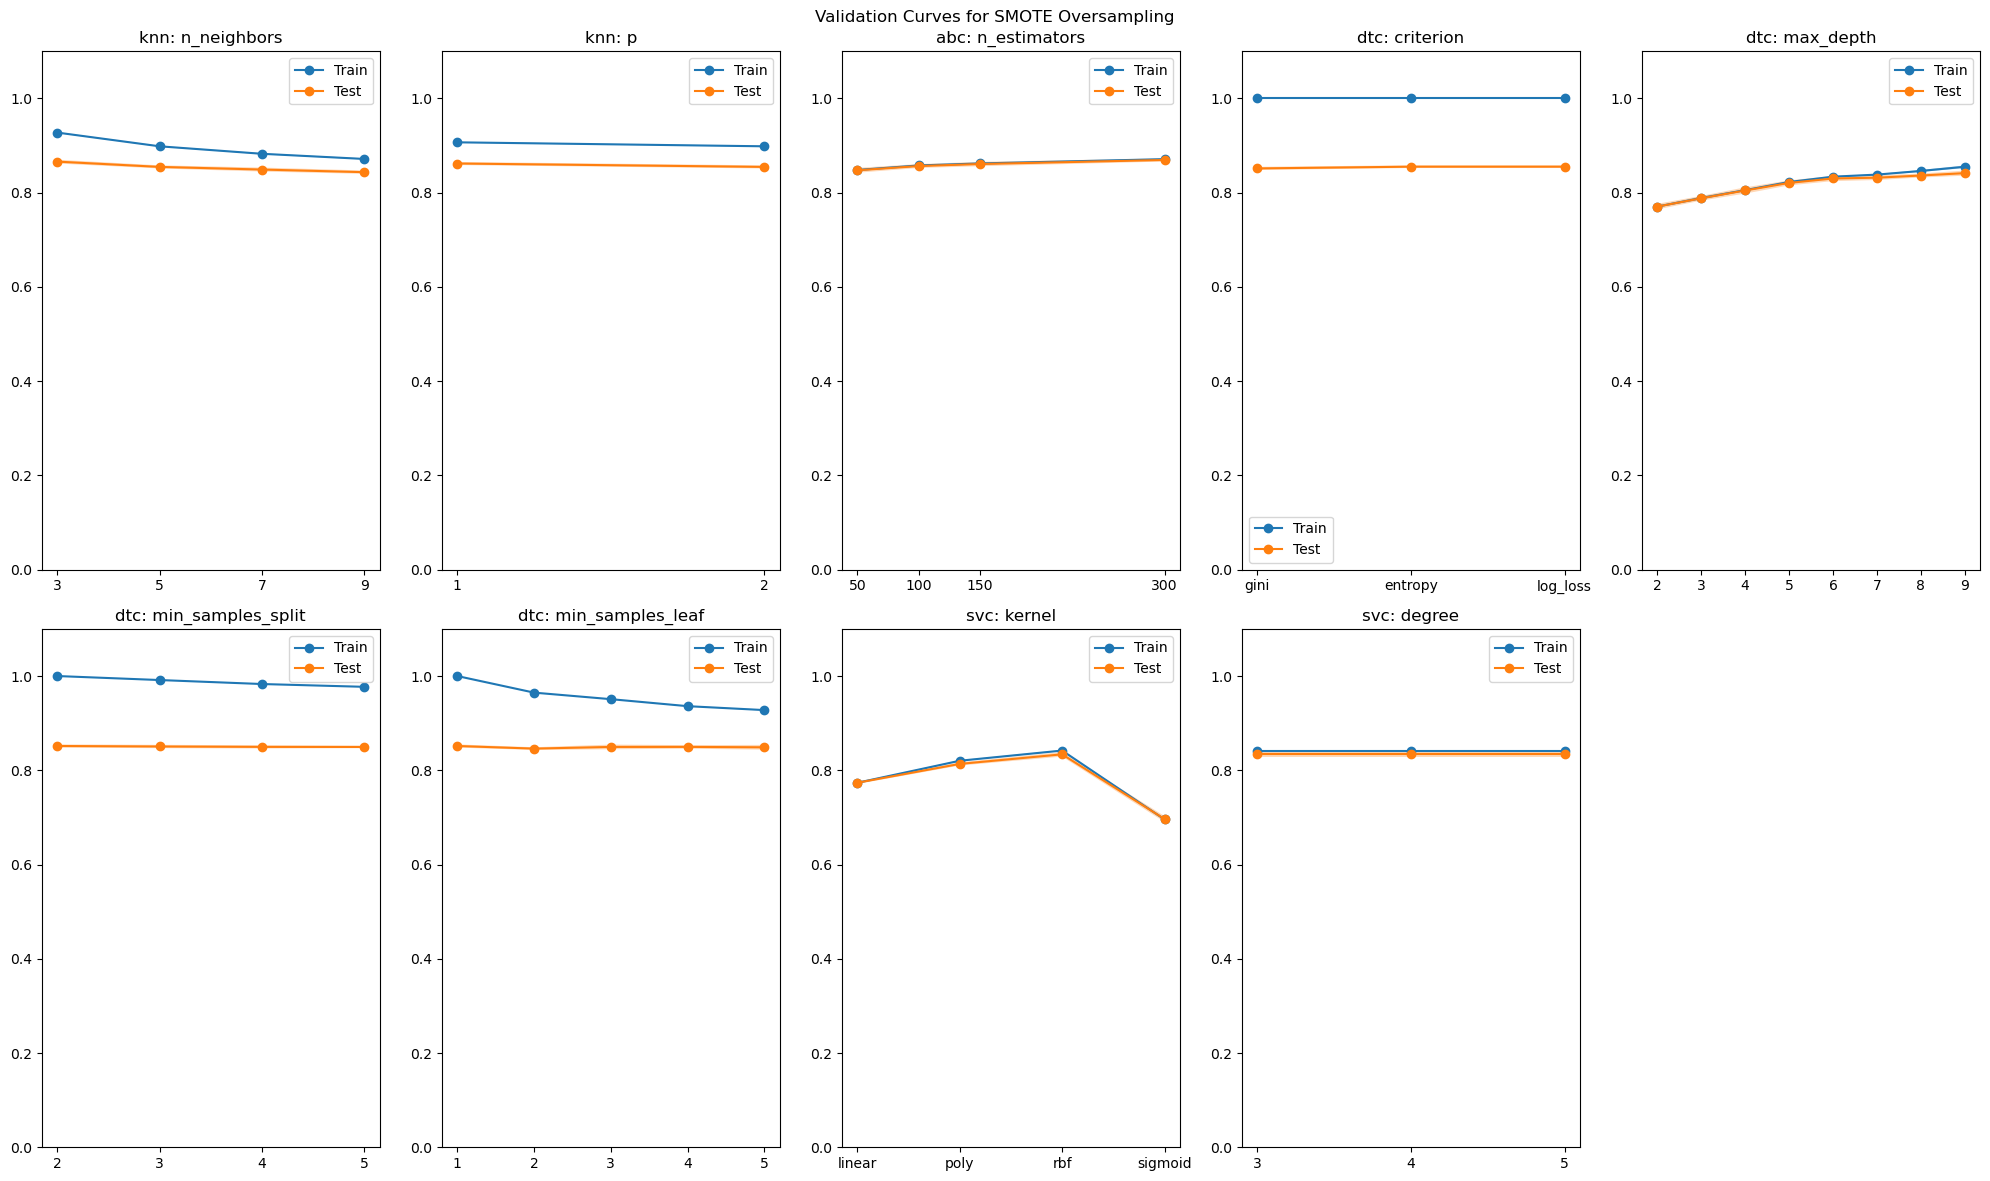

In [48]:
counter = 0
fig, ((ax0,ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8,ax9)) = plt.subplots(nrows=2,ncols=5, figsize=(20, 12))
axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
axs[-1].axis('off')
for name, items in smodels.items():
    model = items['model']
    params = items["param"]
    vc_data = items['vc']
    for param_name, results in vc_data.items():
        axs[counter].plot(params[param_name], results['train_score'].mean(axis=1), "o-", label = "Train")
        axs[counter].fill_between(
            params[param_name],
            results['train_score'].mean(axis=1) - results['train_score'].std(axis=1),
            results['train_score'].mean(axis=1) + results['train_score'].std(axis=1),
            alpha=0.3,
        )

        axs[counter].plot(params[param_name], results['test_score'].mean(axis=1), "o-", label = "Test")
        axs[counter].fill_between(
            params[param_name],
            results['test_score'].mean(axis=1) - results['test_score'].std(axis=1),
            results['test_score'].mean(axis=1) + results['test_score'].std(axis=1),
            alpha=0.3,
        )

        if param_name not in ['criterion','kernel']:
            axs[counter].set_xticks(params[param_name])

        axs[counter].legend()
        axs[counter].set_ylim(0,1.1)
        axs[counter].set_title(f"{name}: {param_name}")
        counter+=1
plt.suptitle("Validation Curves for SMOTE Oversampling")
plt.tight_layout()


In [150]:
model = smodels['dtc']['gs'].best_estimator_
print(model)
print(model.get_depth())
param = {
 'max_depth': list(range(1,53))}
vc = dict()

DecisionTreeClassifier(criterion='entropy', random_state=42)
52


In [151]:
for param_name, param_range in param.items():
    train_score, test_score = validation_curve(estimator = model, param_name = param_name, param_range=param_range, **vcs_common_params)
    vc[param_name] = {
        'train_score':train_score,
        'test_score':test_score
    }
    print(name)
    print(param_name, param_range)

nnc
max_depth [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


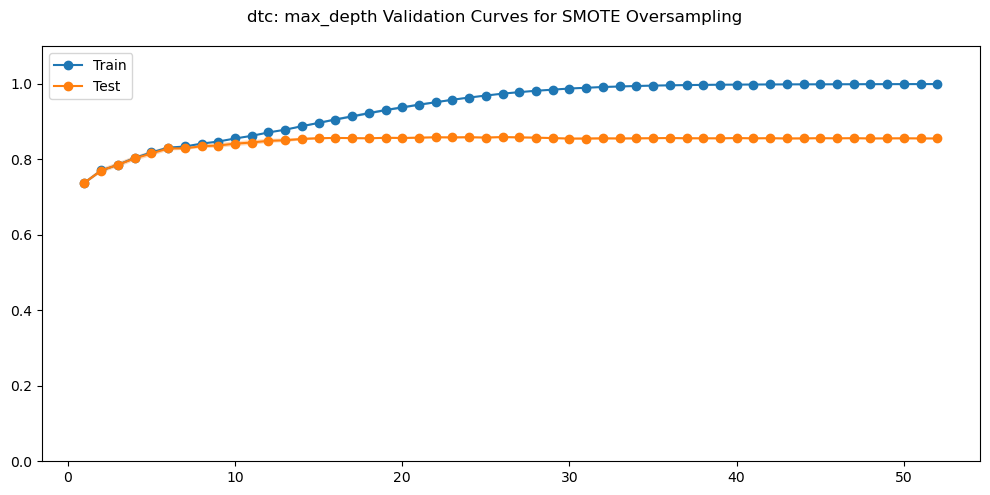

In [152]:
name = "dtc"
fig, ax = plt.subplots(figsize=(10,5))
vc_data = vc
ax.plot(param["max_depth"], vc['max_depth']['train_score'].mean(axis=1), "o-", label = "Train")
ax.fill_between(
    param["max_depth"],
    vc['max_depth']['train_score'].mean(axis=1) - vc['max_depth']['train_score'].std(axis=1),
    vc['max_depth']['train_score'].mean(axis=1) + vc['max_depth']['train_score'].std(axis=1),
    alpha=0.3,
)
ax.plot(param["max_depth"], vc['max_depth']['test_score'].mean(axis=1), "o-", label = "Test")
ax.fill_between(
    param["max_depth"],
    vc['max_depth']['test_score'].mean(axis=1) - vc['max_depth']['test_score'].std(axis=1),
    vc['max_depth']['test_score'].mean(axis=1) + vc['max_depth']['test_score'].std(axis=1),
    alpha=0.3,
)
ax.legend()
ax.set_ylim(0,1.1)
plt.suptitle(f"{name}: {param_name} "+"Validation Curves for SMOTE Oversampling")
plt.tight_layout()

## Decision Tree

<Axes: >

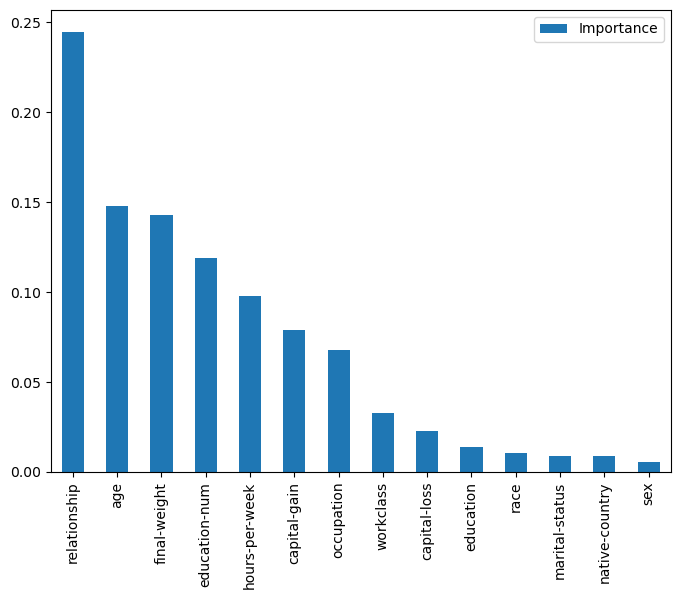

In [49]:
feat_importances = pd.DataFrame(smodels['dtc']['gs'].best_estimator_.feature_importances_, index=Xs_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

## Neural Network

In [50]:
nn_param = {
    "hidden_layer_sizes":[(5,),(5,5),(5,5,5), (10,),(10,10),(10,10,10), (15,),(15,15),(15,15,15), (20,),(20,20),(20,20,20), (30,),(30,30),(30,30,30), (50,),(50,50),(50,50,50), (100,),(100,100),(100,100,100)],
    "early_stopping": [True, False],
}

In [51]:
nn_model = {
    "nnc":{
        'model':MLPClassifier(max_iter = 2000, random_state=RAND_STATE),
        'param': nn_param
    },
}

nn_model['nnc']['gs'] = GridSearchCV(estimator = nn_model['nnc']['model'], param_grid = nn_param, cv = CV_SPLITS, scoring = SCORING_METRIC, n_jobs = -1, return_train_score = True, verbose=VERBOSE)
nn_model['nnc']['gs'].fit(X_train, y_train)
nn_model['nnc']['ypred'] = nn_model['nnc']['gs'].best_estimator_.predict(X_test)
print(nn_model['nnc']['gs'].best_estimator_)
print(classification_report(y_test, nn_model['nnc']['ypred']))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
MLPClassifier(hidden_layer_sizes=(20,), max_iter=2000, random_state=42)
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6767
           1       0.73      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.78      9049
weighted avg       0.84      0.85      0.84      9049



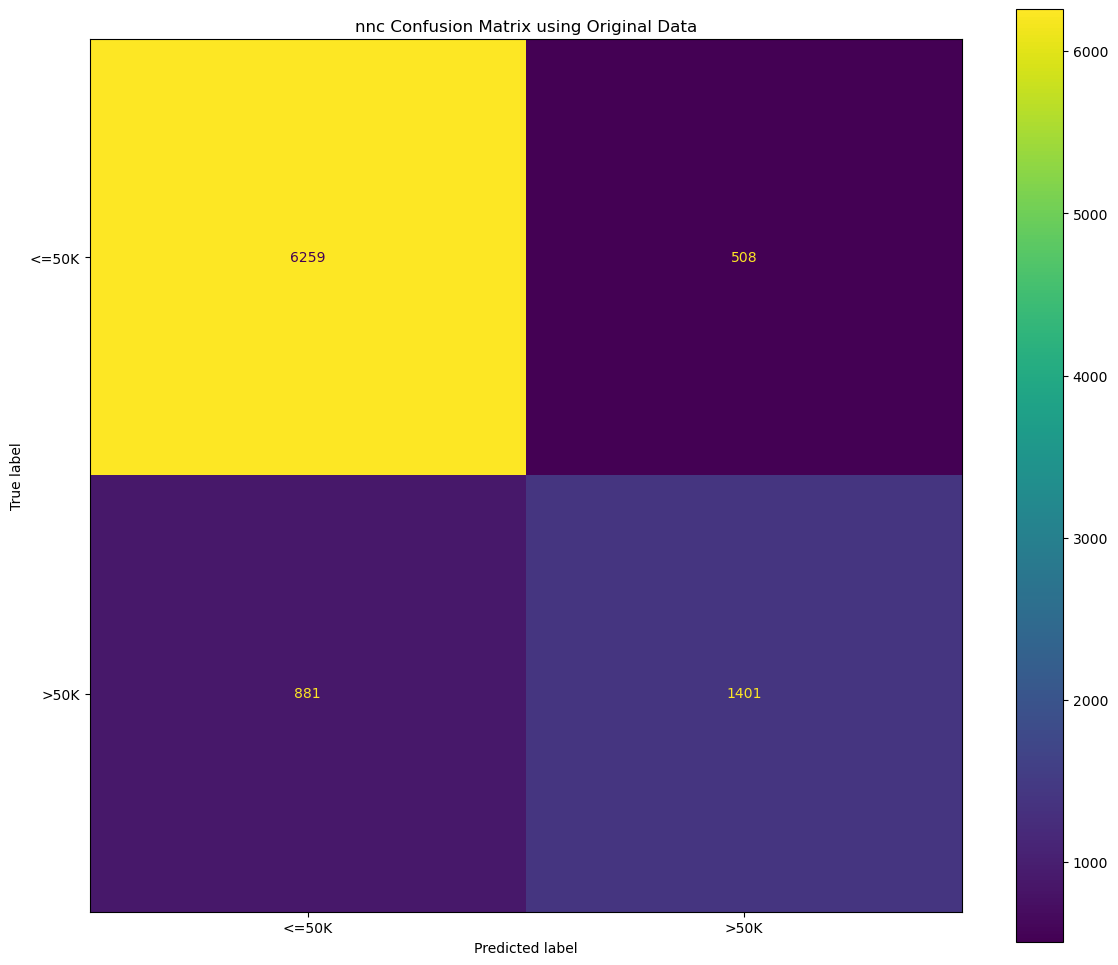

In [52]:
fig, ax0 = plt.subplots(1,1, figsize=(12, 10))
model = nn_model['nnc']['gs'].best_estimator_
name = "nnc"
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax0, display_labels=['<=50K', '>50K']) #Using the Over Sampled Dataset
ax0.set_title(f"{name} Confusion Matrix using Original Data")
plt.tight_layout()

In [53]:
nns_model = {
    "nnc":{
        'model':MLPClassifier(max_iter = 2000, random_state=RAND_STATE),
        'param': nn_param
    },
}

nns_model['nnc']['gs'] = GridSearchCV(estimator = nns_model['nnc']['model'], param_grid = nn_param, cv = CV_SPLITS, scoring = SCORING_METRIC, n_jobs = -1, return_train_score = True, verbose=VERBOSE)
nns_model['nnc']['gs'].fit(Xs_train, ys_train)
nns_model['nnc']['ypred'] = nns_model['nnc']['gs'].best_estimator_.predict(Xs_test)
print(nns_model['nnc']['gs'].best_estimator_)
print(classification_report(ys_test, nns_model['nnc']['ypred']))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000,
              random_state=42)
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      6782
           1       0.84      0.92      0.88      6811

    accuracy                           0.87     13593
   macro avg       0.87      0.87      0.87     13593
weighted avg       0.87      0.87      0.87     13593



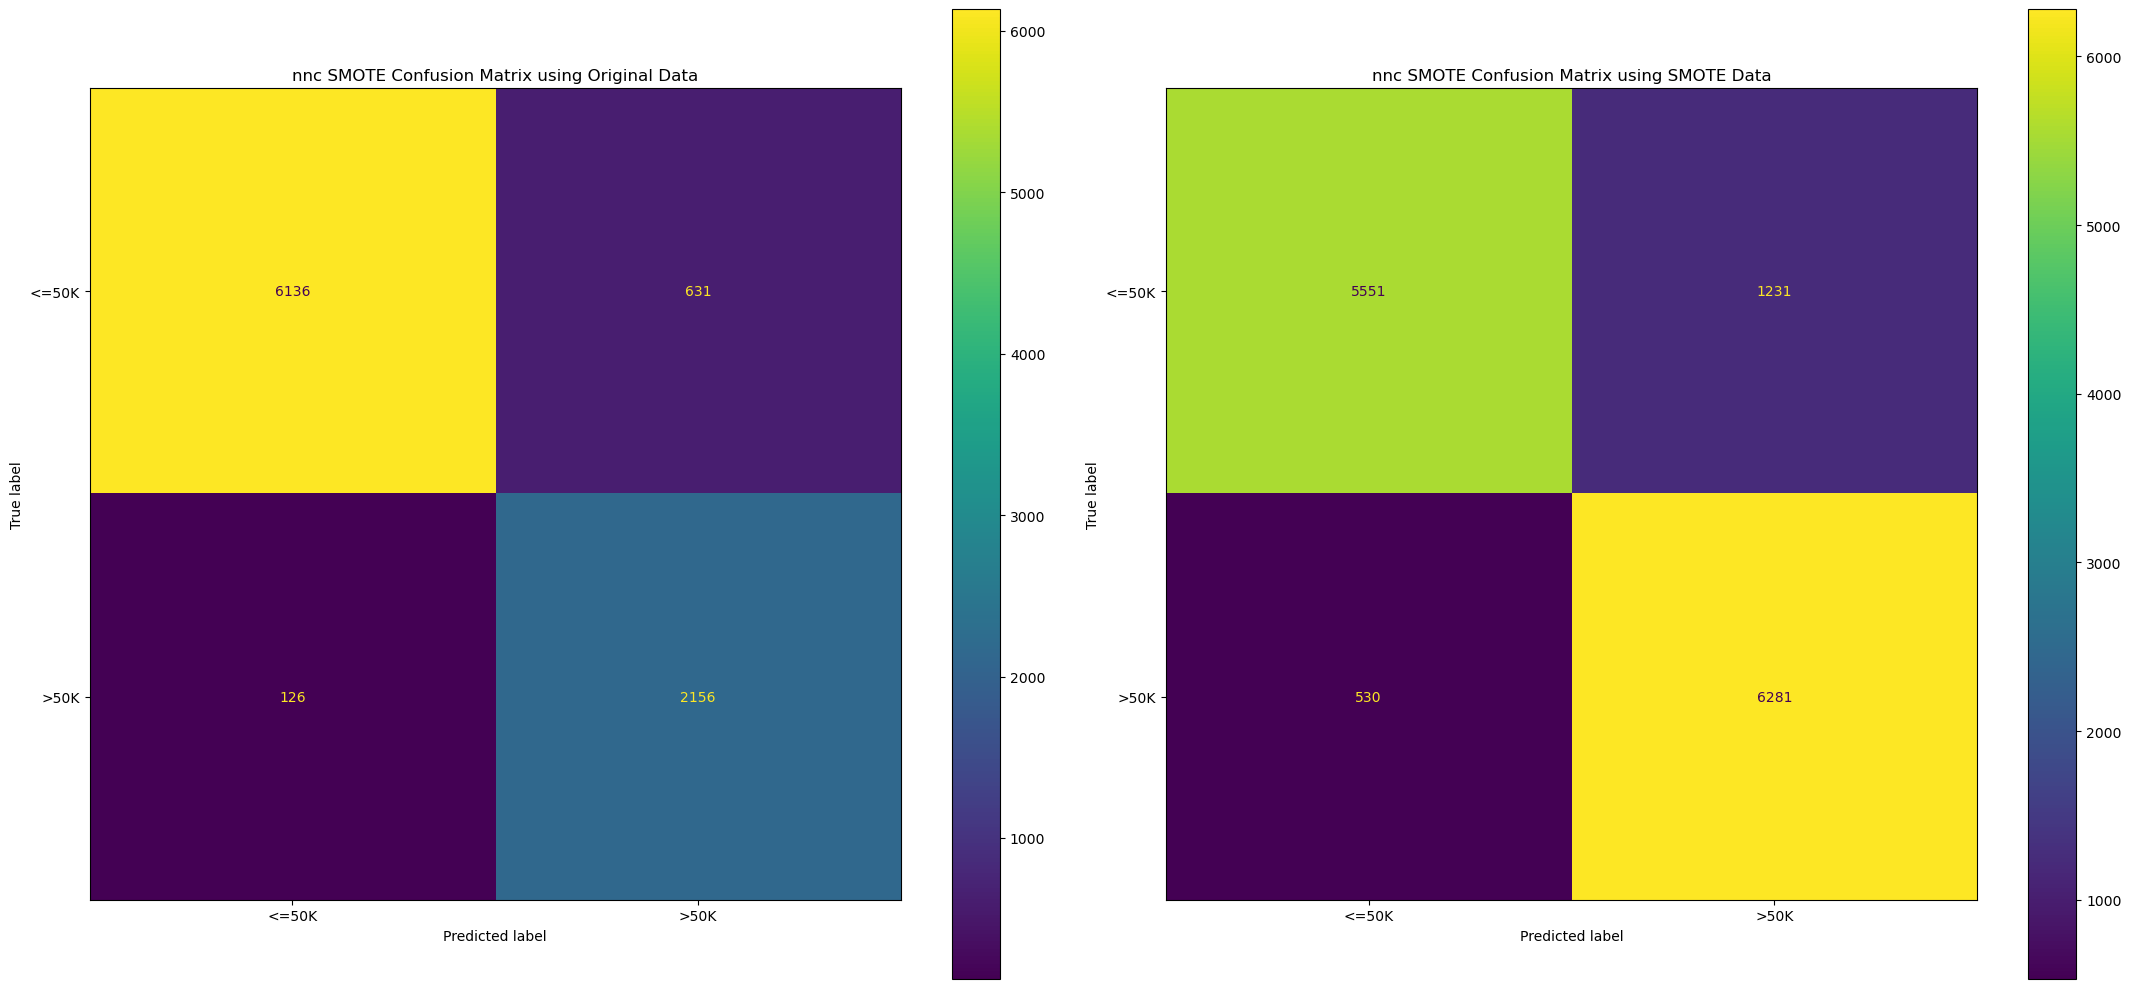

In [54]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(22, 10))
model = nns_model['nnc']['gs'].best_estimator_
name = "nnc"
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax0, display_labels=['<=50K', '>50K']) #Using the Over Sampled Dataset
ax0.set_title(f"{name} SMOTE Confusion Matrix using Original Data")

ConfusionMatrixDisplay.from_estimator(model, Xs_test, ys_test,ax=ax1, display_labels=['<=50K', '>50K']) #Using the Over Sampled Dataset
ax1.set_title(f"{name} SMOTE Confusion Matrix using SMOTE Data")
plt.tight_layout()

In [56]:
model = nn_model['nnc']['gs'].best_estimator_
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(model, **lc_common_params)
nn_model['nnc']['lc'] = {
    "train_sizes":train_sizes,
    "train_scores":train_scores,
    "test_scores":test_scores,
    "fit_times":fit_times,
    "score_times":score_times,
}
print("Done No.OS Model")

model = nns_model['nnc']['gs'].best_estimator_
train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(model, **lcs_common_params)
nns_model['nnc']['lc'] = {
    "train_sizes":train_sizes,
    "train_scores":train_scores,
    "test_scores":test_scores,
    "fit_times":fit_times,
    "score_times":score_times,
}

print("Done SMOTE Model")

Done No.OS Model
Done SMOTE Model


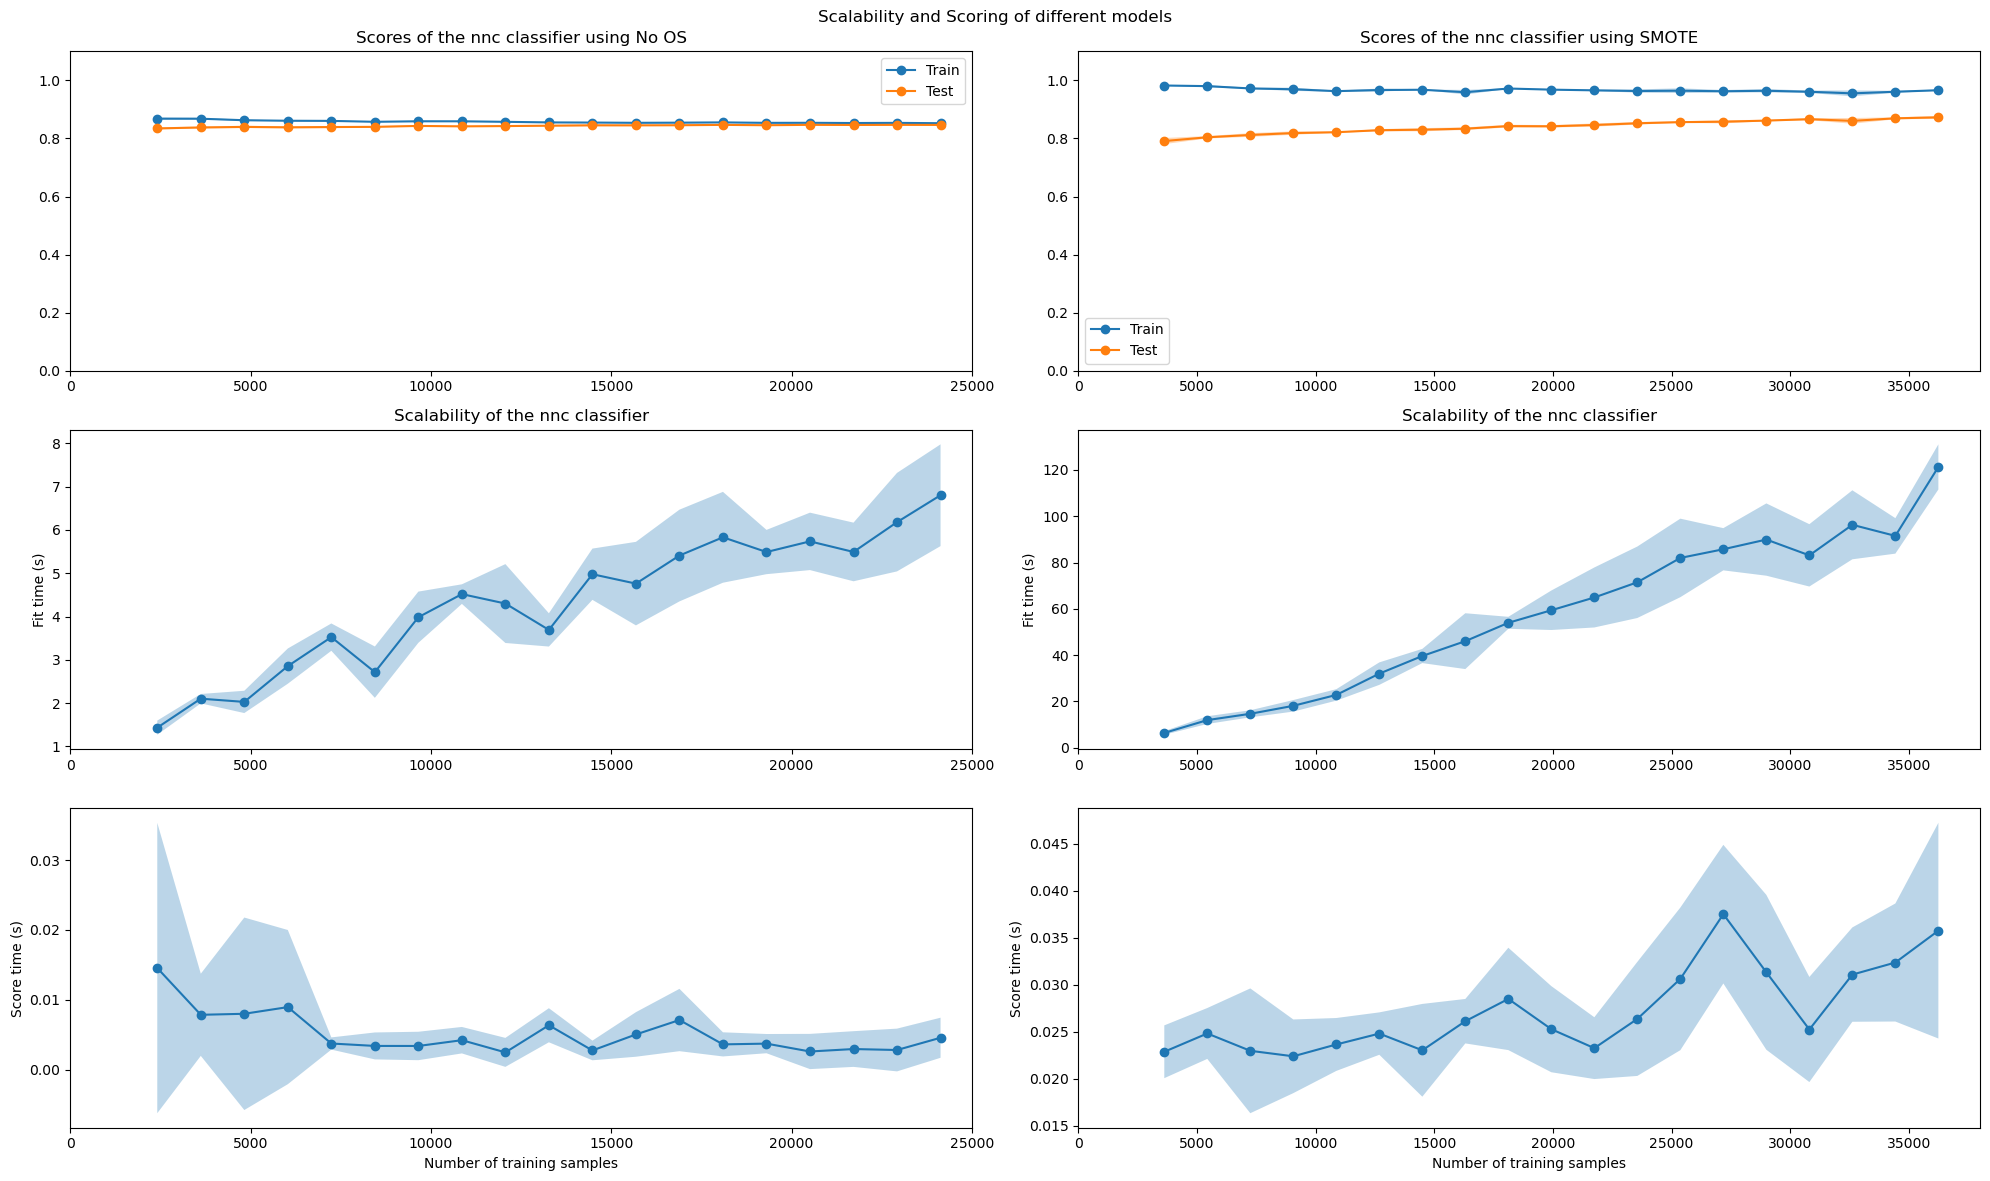

In [57]:
fig, ((ax00,ax01),(ax10,ax11),(ax20,ax21)) = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
axs = [(ax00,ax01),(ax10,ax11),(ax20,ax21)]
plt.suptitle("Scalability and Scoring of different models")

for i, m in enumerate([list(nn_model.items())[0],list(nns_model.items())[0]]):
    name = m[0]
    mdic = m[1]
    lc_data = mdic['lc']
    
    axs[0][i].plot(lc_data['train_sizes'], lc_data['train_scores'].mean(axis=1), "o-", label='Train')
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['train_scores'].mean(axis=1) - lc_data['train_scores'].std(axis=1),
        lc_data['train_scores'].mean(axis=1) + lc_data['train_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].plot(lc_data['train_sizes'], lc_data['test_scores'].mean(axis=1), "o-", label='Test')
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['test_scores'].mean(axis=1) - lc_data['test_scores'].std(axis=1),
        lc_data['test_scores'].mean(axis=1) + lc_data['test_scores'].std(axis=1),
        alpha=0.3,
    )
    type_method = "No OS" if i == 0 else "SMOTE"
    axs[0][i].set_title(
        f"Scores of the {name} classifier using "+type_method
    )
    axs[0][i].legend()
    top_lim = 25000 if i == 0 else 38000
    axs[0][i].set_xlim(0,top_lim)
    axs[0][i].set_ylim(0,1.1)

    axs[1][i].plot(lc_data['train_sizes'], lc_data['fit_times'].mean(axis=1), "o-")
    axs[1][i].fill_between(
        lc_data['train_sizes'],
        lc_data['fit_times'].mean(axis=1) - lc_data['fit_times'].std(axis=1),
        lc_data['fit_times'].mean(axis=1) + lc_data['fit_times'].std(axis=1),
        alpha=0.3,
    )
    axs[1][i].set_ylabel("Fit time (s)")
    axs[1][i].set_title(
        f"Scalability of the {name} classifier"
    )
    axs[1][i].set_xlim(0,top_lim)

    axs[2][i].plot(lc_data["train_sizes"], lc_data["score_times"].mean(axis=1), "o-")
    axs[2][i].fill_between(
        lc_data["train_sizes"],
        lc_data["score_times"].mean(axis=1) - lc_data["score_times"].std(axis=1),
        lc_data["score_times"].mean(axis=1) + lc_data["score_times"].std(axis=1),
        alpha=0.3,
    )
    axs[2][i].set_ylabel("Score time (s)")
    axs[2][i].set_xlabel("Number of training samples")
    axs[2][i].set_xlim(0,top_lim)

plt.tight_layout()
plt.show()

In [58]:
vc = dict()
vcs = dict()
for param_name, param_range in nn_param.items():
    train_score, test_score = validation_curve(estimator = nn_model['nnc']['gs'].best_estimator_, param_name = param_name, param_range=param_range, **vc_common_params)
    vc[param_name] = {
        'train_score': train_score,
        'test_score':test_score
    }
    train_score, test_score = validation_curve(estimator = nns_model['nnc']['gs'].best_estimator_, param_name = param_name, param_range=param_range, **vcs_common_params)
    vcs[param_name] = {
        'train_score': train_score,
        'test_score':test_score
    }

nn_model['nnc']['vc'] = vc
nns_model['nnc']['vc'] = vcs

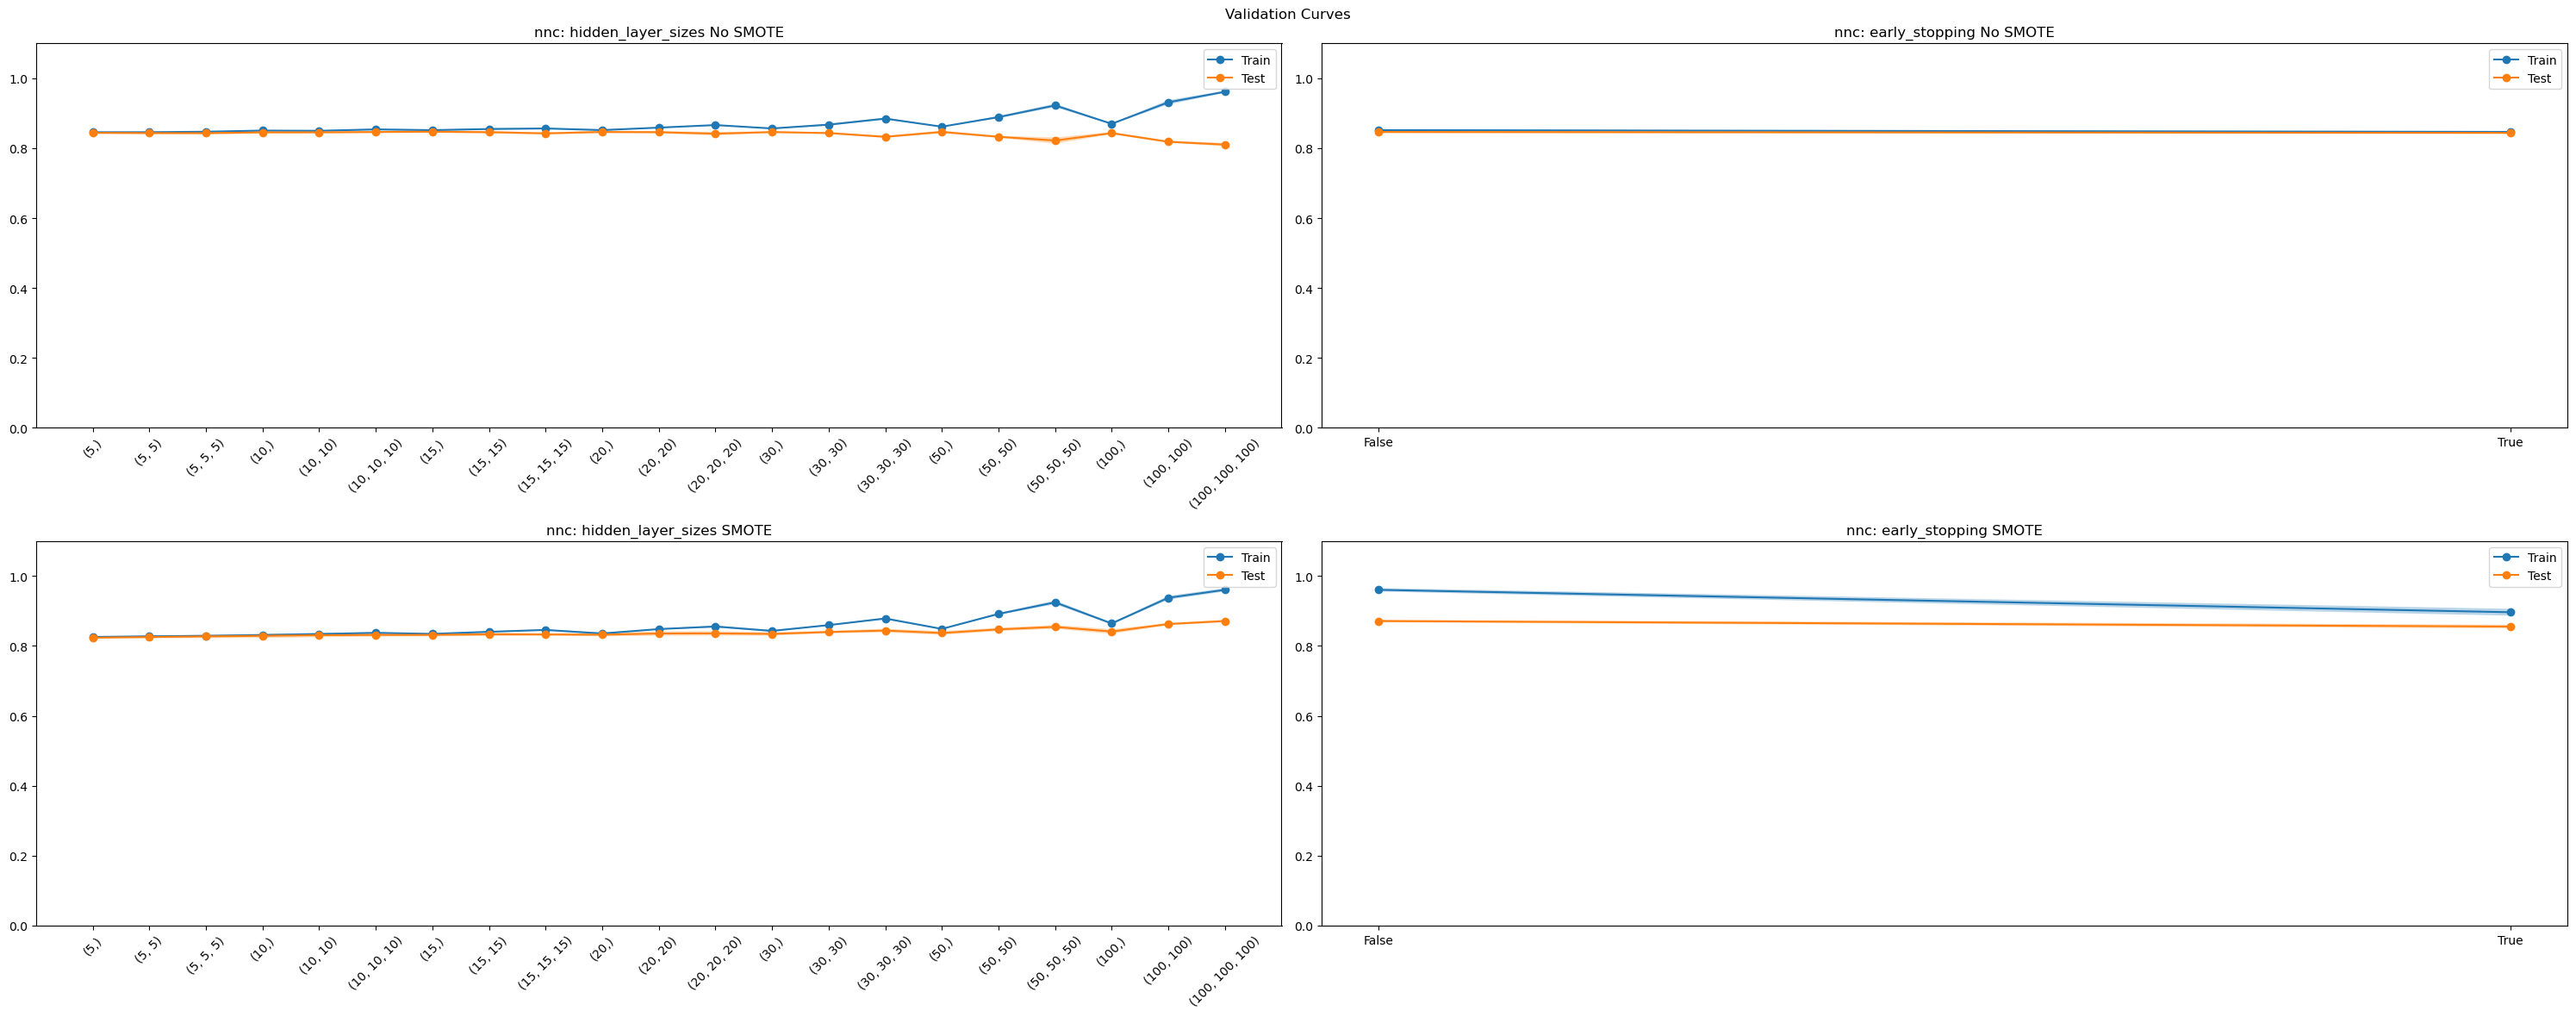

In [59]:
counter = 0
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(30, 12))
axs = [ax0,ax1,ax2,ax3]

for name, items in nn_model.items():
    model = items['model']
    params = items["param"]
    vc_data = items['vc']
    for param_name, results in vc_data.items():
        param_range = params[param_name]
        if param_name == "hidden_layer_sizes":
            param_range = [str(prange) for prange in param_range]
            axs[counter].tick_params(axis='x', rotation=45)
        axs[counter].plot(param_range, results['train_score'].mean(axis=1), "o-", label = "Train")
        axs[counter].fill_between(
            param_range,
            results['train_score'].mean(axis=1) - results['train_score'].std(axis=1),
            results['train_score'].mean(axis=1) + results['train_score'].std(axis=1),
            alpha=0.3,
        )

        axs[counter].plot(param_range, results['test_score'].mean(axis=1), "o-", label = "Test")
        axs[counter].fill_between(
            param_range,
            results['test_score'].mean(axis=1) - results['test_score'].std(axis=1),
            results['test_score'].mean(axis=1) + results['test_score'].std(axis=1),
            alpha=0.3,
        )
        
        if param_name == "early_stopping":
            axs[counter].set_xticks([0, 1])
            axs[counter].set_xticklabels(["False", "True"])

        axs[counter].legend()
        axs[counter].set_ylim(0,1.1)
        axs[counter].set_title(f"{name}: {param_name} No SMOTE")
        counter+=1

for name, items in nns_model.items():
    model = items['model']
    params = items["param"]
    vc_data = items['vc']
    for param_name, results in vc_data.items():
        param_range = params[param_name]
        if param_name == "hidden_layer_sizes":
            param_range = [str(prange) for prange in param_range]
            axs[counter].tick_params(axis='x', rotation=45)
        axs[counter].plot(param_range, results['train_score'].mean(axis=1), "o-", label = "Train")
        axs[counter].fill_between(
            param_range,
            results['train_score'].mean(axis=1) - results['train_score'].std(axis=1),
            results['train_score'].mean(axis=1) + results['train_score'].std(axis=1),
            alpha=0.3,
        )

        axs[counter].plot(param_range, results['test_score'].mean(axis=1), "o-", label = "Test")
        axs[counter].fill_between(
            param_range,
            results['test_score'].mean(axis=1) - results['test_score'].std(axis=1),
            results['test_score'].mean(axis=1) + results['test_score'].std(axis=1),
            alpha=0.3,
        )

        if param_name == "early_stopping":
            axs[counter].set_xticks([0, 1])
            axs[counter].set_xticklabels(["False", "True"])

        axs[counter].legend()
        axs[counter].set_ylim(0,1.1)
        axs[counter].set_title(f"{name}: {param_name} SMOTE")
        counter+=1

plt.suptitle("Validation Curves")
plt.tight_layout()


In [60]:
import json

In [156]:
def create_json_dict(model_dict):
    dictionary = dict()
    for name, mdic in model_dict.items():
        dictionary[name]=dict()
        for k,v in mdic.items():
            if k in ['lc']:
                dictionary[name][k]=dict()
                for vname, vvalue in v.items():
                    if type(vvalue) is np.ndarray:
                        vvalue=vvalue.tolist()
                        dictionary[name][k][vname]=vvalue
            if k in ['vc']:
                dictionary[name][k]=dict()
                for param_name,param_data in v.items():
                    dictionary[name][k][param_name]=dict()
                    for param_metric, param_vals in param_data.items():
                        if type(param_vals) is np.ndarray:
                            param_vals=param_vals.tolist()
                        dictionary[name][k][param_name][param_metric]=param_vals
            if k in ['param']:
                dictionary[name][k]=v
            if k in ['ypred']:
                dictionary[name][k]=v.tolist()
    return dictionary

In [157]:
dictionary = create_json_dict(smodels)
with open("Adult_smodels.json", "w") as outfile:
    json.dump(dictionary, outfile)

dictionary = create_json_dict(models)
with open("Adult_models.json", "w") as outfile:
    json.dump(dictionary, outfile)

dictionary = create_json_dict(nns_model)
with open("Adult_nns_model.json", "w") as outfile:
    json.dump(dictionary, outfile)

dictionary = create_json_dict(nn_model)
with open("Adult_nn_model.json", "w") as outfile:
    json.dump(dictionary, outfile)

In [158]:
import pickle

for i,d in enumerate([smodels,models,nns_model,nn_model]):
    for name ,mdic in d.items():
        model = mdic['gs'].best_estimator_
        os_method = ".save" if i%2 else "_smote.save"
        with open(f'adult_{name}{os_method}', 'wb') as pickle_file:
            pickle.dump(model, pickle_file)

In [64]:
fdata = pd.DataFrame()

for i,d in enumerate([smodels,models,nns_model,nn_model]):
    for name,mdic in d.items():
        for metric,data in mdic.items():
            if metric in ['lc']:
                train_sizes = np.array(mdic[metric]["train_sizes"])
                train_percent = np.round(train_sizes/len(X_curve if i%2 else Xs_curve),2)
                model = [name]*len(train_sizes)
                method = ["No.OS" if i%2 else "SMOTE"]*len(train_sizes)
                train_scores = mdic[metric]["train_scores"].mean(axis=1)
                test_scores = mdic[metric]["test_scores"].mean(axis=1)
                fit_times = mdic[metric]["fit_times"].mean(axis=1)
                score_times = mdic[metric]["score_times"].mean(axis=1)
        data = {
            "model": model,
            "OS":method,
            "train_sizes":train_sizes,
            "train_percent":train_percent,
            "train_scores":train_scores,
            "test_scores":test_scores,
            "fit_times":fit_times,
            "score_times":score_times,
        }
        fdata = pd.concat([fdata,pd.DataFrame.from_dict(data)])


In [71]:
min_fit_times = fdata.groupby(["model","OS"]).agg({"train_scores":max}).reset_index()
gbdata = pd.merge(left = min_fit_times, right = fdata, how = "left", on = ["model","train_scores","OS"])
gbdata = gbdata.groupby(["model","OS"]).agg({"train_scores":"first","test_scores":"max"}).reset_index()
gbdata = pd.merge(left = gbdata, right = fdata, how = "left", on = ["model","OS","train_scores","test_scores"])
gbdata

,model,OS,train_scores,test_scores,train_sizes,train_percent,fit_times,score_times
0,abc,No.OS,0.886484,0.852065,2412,0.08,2.315295,0.476344
1,abc,SMOTE,0.873731,0.859716,3624,0.08,2.224548,0.384193
2,dtc,No.OS,0.887811,0.837246,2412,0.08,0.025146,0.005560
3,dtc,SMOTE,1.000000,0.844906,25372,0.56,0.407818,0.008794
4,knn,No.OS,0.862353,0.831908,20509,0.68,0.127501,3.788307
5,knn,SMOTE,0.933609,0.873819,36246,0.80,0.221399,5.342225
6,nnc,No.OS,0.868159,0.834527,2412,0.08,1.431114,0.014549
7,nnc,SMOTE,0.982340,0.791030,3624,0.08,6.361263,0.022868
8,svc,No.OS,0.867993,0.833565,2412,0.08,0.289609,1.471426
9,svc,SMOTE,0.846652,0.823122,5436,0.12,0.958255,2.929443


In [79]:
train_score_pivot_smote = fdata[fdata.OS=="SMOTE"].pivot_table(values="train_scores",index=["model"],columns="train_sizes").reset_index()
train_score_pivot_smote = pd.merge(left = train_score_pivot_smote, right = gbdata[gbdata.OS=="SMOTE"],on="model").drop(columns=['OS',"train_scores",'train_percent','fit_times','score_times'])
train_score_pivot_smote = train_score_pivot_smote.rename(columns={"train_sizes":"optimal_train_size"})
train_score_pivot_smote.to_excel("adult_smote_train_score_pivot.xlsx")
train_score_pivot_smote

,model,3624,5436,7249,9061,10873,12686,14498,16310,18123,...,23559,25372,27184,28996,30809,32621,34433,36246,test_scores,optimal_train_size
0,abc,0.873731,0.872517,0.872589,0.870809,0.873099,0.872048,0.871582,0.871465,0.870386,...,0.871107,0.870621,0.870858,0.869830,0.870382,0.870826,0.870432,0.871186,0.859716,3624
1,dtc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.999985,0.999986,0.999987,0.999988,0.999988,0.999983,0.844906,25372
2,knn,0.893929,0.895769,0.900455,0.903013,0.906447,0.910500,0.913188,0.916002,0.918777,...,0.924725,0.926123,0.927340,0.928418,0.929806,0.931167,0.932071,0.933609,0.873819,36246
3,nnc,0.982340,0.980169,0.972189,0.969407,0.962862,0.966735,0.967720,0.959191,0.971936,...,0.963318,0.964449,0.962507,0.964230,0.960784,0.955244,0.960811,0.966038,0.791030,3624
4,svc,0.844868,0.846652,0.843206,0.839664,0.842233,0.843103,0.841551,0.841974,0.840578,...,0.840868,0.840596,0.840642,0.840771,0.840612,0.841673,0.841634,0.841847,0.823122,5436


In [67]:
train_score_pivot_nos = fdata[fdata.OS=="No.OS"].pivot_table(values="train_scores",index=["model"],columns="train_sizes").reset_index()
train_score_pivot_nos

train_sizes,model,2412,3619,4825,6032,7238,8445,9651,10858,12064,13270,14477,15683,16890,18096,19303,20509,21716,22922,24129
0,abc,0.886484,0.878143,0.874155,0.872779,0.873335,0.873037,0.872759,0.870565,0.869148,0.868335,0.867818,0.867691,0.867969,0.868921,0.868539,0.868302,0.868696,0.869339,0.868092
1,dtc,0.887811,0.876706,0.872705,0.868435,0.869080,0.866572,0.866957,0.863824,0.863246,0.861206,0.859902,0.859058,0.858129,0.858809,0.858540,0.859116,0.859062,0.859620,0.859455
2,knn,0.856468,0.853551,0.859316,0.858256,0.858884,0.857265,0.859869,0.860232,0.859201,0.860332,0.859142,0.859529,0.859479,0.861616,0.862001,0.862353,0.861789,0.861705,0.861934
3,nnc,0.868159,0.867975,0.862715,0.860908,0.860486,0.857312,0.859103,0.859053,0.857245,0.855237,0.854707,0.853842,0.854352,0.855250,0.853733,0.853869,0.853131,0.853669,0.852435
4,svc,0.867993,0.861840,0.859358,0.858853,0.858994,0.857951,0.860056,0.858022,0.856863,0.855524,0.854334,0.854122,0.853973,0.854167,0.854023,0.853742,0.853813,0.853652,0.853065


In [109]:
test_score_pivot_smote = fdata[fdata.OS=="SMOTE"].pivot_table(values="test_scores",index=["model"],columns="train_sizes").reset_index()
test_score_pivot_smote = pd.merge(left = test_score_pivot_smote, right = gbdata[gbdata.OS=="SMOTE"],on="model").drop(columns=['OS',"test_scores",'train_percent','fit_times','score_times'])
test_score_pivot_smote = test_score_pivot_smote.rename(columns={"train_sizes":"optimal_train_size"})
test_score_pivot_smote.to_excel("adult_smote_test_score_pivot.xlsx")
test_score_pivot_smote

,model,3624,5436,7249,9061,10873,12686,14498,16310,18123,...,23559,25372,27184,28996,30809,32621,34433,36246,train_scores,optimal_train_size
0,abc,0.859716,0.863424,0.863976,0.865896,0.866779,0.867551,0.868125,0.868743,0.868500,...,0.869537,0.869891,0.869648,0.869184,0.869405,0.869074,0.869008,0.869449,0.873731,3624
1,dtc,0.791759,0.802971,0.807915,0.811623,0.818796,0.823056,0.833032,0.836740,0.838042,...,0.841176,0.844906,0.847091,0.847886,0.849320,0.852521,0.854595,0.855235,1.000000,25372
2,knn,0.794253,0.804339,0.811799,0.817140,0.824137,0.829213,0.834356,0.838461,0.843604,...,0.855500,0.858127,0.860665,0.862585,0.865432,0.868456,0.870972,0.873819,0.933609,36246
3,nnc,0.791030,0.804008,0.811998,0.818531,0.821422,0.828375,0.830140,0.833605,0.842522,...,0.852256,0.856184,0.857575,0.861459,0.866315,0.860510,0.869317,0.872583,0.982340,3624
4,svc,0.819281,0.823122,0.823850,0.826763,0.827735,0.829831,0.829390,0.830229,0.831774,...,0.832634,0.833583,0.833694,0.833495,0.833893,0.833672,0.833848,0.833893,0.846652,5436


In [ ]:
train_score_pivot_nos = fdata[fdata.OS=="No.OS"].pivot_table(values="train_scores",index=["model"],columns="train_sizes").reset_index()
train_score_pivot_nos

train_sizes,model,2412,3619,4825,6032,7238,8445,9651,10858,12064,13270,14477,15683,16890,18096,19303,20509,21716,22922,24129
0,abc,0.886484,0.878143,0.874155,0.872779,0.873335,0.873037,0.872759,0.870565,0.869148,0.868335,0.867818,0.867691,0.867969,0.868921,0.868539,0.868302,0.868696,0.869339,0.868092
1,dtc,0.887811,0.876706,0.872705,0.868435,0.869080,0.866572,0.866957,0.863824,0.863246,0.861206,0.859902,0.859058,0.858129,0.858809,0.858540,0.859116,0.859062,0.859620,0.859455
2,knn,0.856468,0.853551,0.859316,0.858256,0.858884,0.857265,0.859869,0.860232,0.859201,0.860332,0.859142,0.859529,0.859479,0.861616,0.862001,0.862353,0.861789,0.861705,0.861934
3,nnc,0.868159,0.867975,0.862715,0.860908,0.860486,0.857312,0.859103,0.859053,0.857245,0.855237,0.854707,0.853842,0.854352,0.855250,0.853733,0.853869,0.853131,0.853669,0.852435
4,svc,0.867993,0.861840,0.859358,0.858853,0.858994,0.857951,0.860056,0.858022,0.856863,0.855524,0.854334,0.854122,0.853973,0.854167,0.854023,0.853742,0.853813,0.853652,0.853065


In [80]:
fit_times_pivot_smote = fdata[fdata.OS=="SMOTE"].pivot_table(values="fit_times",index="model",columns="train_sizes").reset_index()
fit_times_pivot_smote = pd.merge(left = fit_times_pivot_smote, right = gbdata[gbdata.OS=="SMOTE"],on="model").drop(columns=['OS','train_scores','test_scores','train_percent','fit_times'])
fit_times_pivot_smote = fit_times_pivot_smote.rename(columns={"train_sizes":"optimal_train_size"})
fit_times_pivot_smote.to_excel("adult_smote_fit_times_pivot.xlsx")
fit_times_pivot_smote

,model,3624,5436,7249,9061,10873,12686,14498,16310,18123,...,23559,25372,27184,28996,30809,32621,34433,36246,optimal_train_size,score_times
0,abc,2.224548,3.178025,3.932703,4.515244,5.238478,6.101976,7.208353,8.559950,9.293731,...,12.265601,13.105216,14.122068,15.030067,15.681925,16.747507,17.557841,17.863475,3624,0.384193
1,dtc,0.061444,0.081004,0.112091,0.134918,0.174287,0.195455,0.209133,0.264073,0.285069,...,0.374333,0.407818,0.448669,0.477425,0.511379,0.544069,0.559032,0.592351,25372,0.008794
2,knn,0.021873,0.031004,0.034567,0.046995,0.048429,0.067226,0.071311,0.098964,0.121846,...,0.126606,0.132693,0.160910,0.162506,0.201728,0.200828,0.201892,0.221399,36246,5.342225
3,nnc,6.361263,11.898756,14.626420,18.074784,22.781531,31.984927,39.606587,46.014183,53.946665,...,71.461957,81.977168,85.725643,89.918098,83.088066,96.293575,91.501625,121.309415,3624,0.022868
4,svc,0.448609,0.958255,1.750421,2.856500,4.066131,5.372993,7.095880,8.683439,10.655503,...,17.754708,20.733661,23.879323,30.486319,35.703665,38.513630,40.794000,41.925228,5436,2.929443


In [69]:
fit_times_pivot_nos = fdata[fdata.OS=="No.OS"].pivot_table(values="fit_times",index="model",columns="train_sizes").reset_index()
fit_times_pivot_nos = pd.merge(left = fit_times_pivot_nos, right = gbdata[gbdata.OS=="No.OS"],on="model").drop(columns=['OS','train_scores','test_scores','train_percent','fit_times'])
fit_times_pivot_nos.rename(columns={"train_sizes":"optimal_train_size"})

,model,2412,3619,4825,6032,7238,8445,9651,10858,12064,...,15683,16890,18096,19303,20509,21716,22922,24129,optimal_train_size,score_times
0,abc,2.315295,2.878748,3.355480,3.677861,4.133639,4.635144,5.188425,5.717195,6.342293,...,8.009095,8.690964,9.293118,10.210393,10.709978,11.493951,12.343422,12.919532,2412,0.476344
1,dtc,0.025146,0.031558,0.043423,0.046738,0.055381,0.059336,0.072953,0.073313,0.083483,...,0.114561,0.118950,0.131603,0.133309,0.140426,0.157938,0.158354,0.171210,2412,0.005560
2,knn,0.014174,0.019802,0.027130,0.034143,0.037768,0.048600,0.053671,0.060175,0.063442,...,0.101963,0.105861,0.113431,0.115923,0.127501,0.132869,0.139755,0.151872,20509,3.788307
3,nnc,1.431114,2.100841,2.026284,2.853946,3.523466,2.713790,3.983840,4.517878,4.299595,...,4.760165,5.409294,5.831206,5.490252,5.736700,5.491984,6.180712,6.803289,2412,0.014549
4,svc,0.289609,0.605762,1.186488,1.778270,2.591455,3.089255,4.265810,5.273741,7.032828,...,11.958333,16.027600,17.504976,19.841813,25.298717,26.913096,32.257946,31.096690,2412,1.471426


In [140]:
score_times_pivot_smote = fdata[fdata.OS=="SMOTE"].pivot_table(values="score_times",index="model",columns="train_sizes").reset_index()
score_times_pivot_smote = pd.merge(left = score_times_pivot_smote, right = gbdata[gbdata.OS=="SMOTE"],on="model").drop(columns=['OS','train_scores','test_scores','train_percent','score_times'])
score_times_pivot_smote = score_times_pivot_smote.rename(columns={"train_sizes":"optimal_train_size"})
score_times_pivot_smote

,model,3624,5436,7249,9061,10873,12686,14498,16310,18123,...,23559,25372,27184,28996,30809,32621,34433,36246,optimal_train_size,fit_times
0,abc,0.384193,0.412171,0.413576,0.375073,0.405016,0.398282,0.510268,0.427486,0.383823,...,0.428187,0.418774,0.488517,0.407937,0.428229,0.419135,0.402717,0.388833,3624,2.224548
1,dtc,0.007486,0.005653,0.008671,0.005621,0.006292,0.006208,0.008689,0.006599,0.006516,...,0.006390,0.008794,0.009411,0.008476,0.007244,0.007275,0.006614,0.005815,25372,0.407818
2,knn,1.279104,1.568004,1.720625,1.989904,2.470875,2.736245,3.088949,3.308834,3.611697,...,4.424119,4.113573,3.955786,4.118897,4.472686,4.998215,5.071244,5.342225,36246,0.221399
3,nnc,0.022868,0.024814,0.022970,0.022387,0.023645,0.024802,0.023023,0.026119,0.028486,...,0.026361,0.030619,0.037498,0.031315,0.025235,0.031072,0.032358,0.035743,3624,6.361263
4,svc,2.087274,2.929443,3.736024,4.687550,5.517416,6.370808,7.227861,8.104278,9.191440,...,11.679695,12.519352,14.995894,16.464004,15.921100,17.341993,16.741847,16.939528,5436,0.958255


In [118]:
fdata[fdata.train_sizes==36246]

,model,OS,train_sizes,train_percent,train_scores,test_scores,fit_times,score_times
18,knn,SMOTE,36246,0.8,0.933609,0.873819,0.221399,5.342225
18,abc,SMOTE,36246,0.8,0.871186,0.869449,17.863475,0.388833
18,dtc,SMOTE,36246,0.8,0.999983,0.855235,0.592351,0.005815
18,svc,SMOTE,36246,0.8,0.841847,0.833893,41.925228,16.939528
18,nnc,SMOTE,36246,0.8,0.966038,0.872583,121.309415,0.035743


In [141]:
fdata[fdata.model=="svc"]

,model,OS,train_sizes,train_percent,train_scores,test_scores,fit_times,score_times
0,svc,SMOTE,3624,0.08,0.844868,0.819281,0.448609,2.087274
1,svc,SMOTE,5436,0.12,0.846652,0.823122,0.958255,2.929443
2,svc,SMOTE,7249,0.16,0.843206,0.823850,1.750421,3.736024
3,svc,SMOTE,9061,0.20,0.839664,0.826763,2.856500,4.687550
4,svc,SMOTE,10873,0.24,0.842233,0.827735,4.066131,5.517416
5,svc,SMOTE,12686,0.28,0.843103,0.829831,5.372993,6.370808
6,svc,SMOTE,14498,0.32,0.841551,0.829390,7.095880,7.227861
7,svc,SMOTE,16310,0.36,0.841974,0.830229,8.683439,8.104278
8,svc,SMOTE,18123,0.40,0.840578,0.831774,10.655503,9.191440
9,svc,SMOTE,19935,0.44,0.840692,0.831619,13.254725,9.593860


KNeighborsClassifier(n_neighbors=3, p=1)
AdaBoostClassifier(n_estimators=300, random_state=42)
DecisionTreeClassifier(criterion='entropy', random_state=42)
SVC(random_state=42)
KNeighborsClassifier(n_neighbors=3, p=1)
AdaBoostClassifier(n_estimators=300, random_state=42)
DecisionTreeClassifier(criterion='entropy', random_state=42)
SVC(random_state=42)
MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000,
              random_state=42)
MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=2000,
              random_state=42)


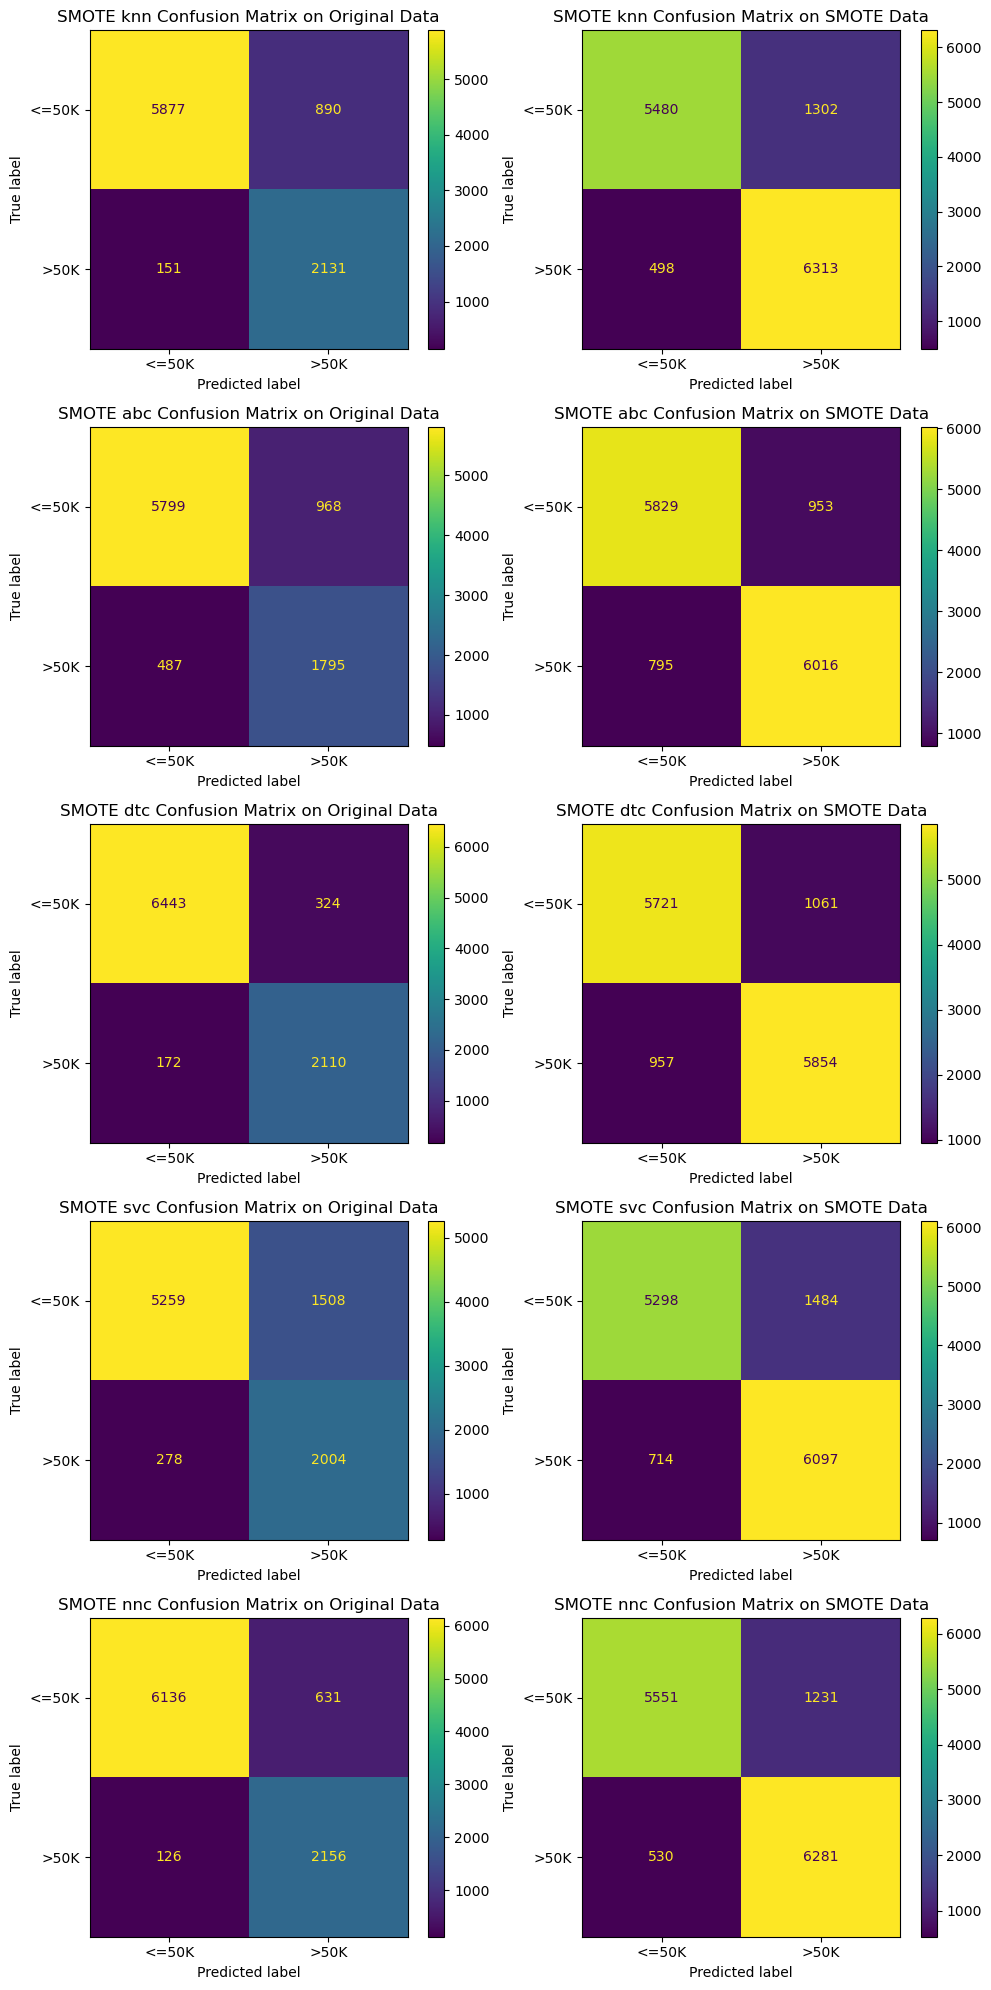

In [145]:
fig, ((ax00, ax01), (ax10, ax11), (ax20, ax21), (ax30, ax31), (ax40, ax41)) = plt.subplots(5, 2, figsize=(10, 20))
axs = [ax00,ax10,ax20,ax30]
for i, (name, mdic) in enumerate(smodels.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"SMOTE {name} Confusion Matrix on Original Data")

axs = [ax01,ax11,ax21,ax31]
for i, (name, mdic) in enumerate(smodels.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, Xs_test, ys_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"SMOTE {name} Confusion Matrix on SMOTE Data")

axs = [ax40]
for i, (name, mdic) in enumerate(nns_model.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"SMOTE {name} Confusion Matrix on Original Data")

axs = [ax41]
for i, (name, mdic) in enumerate(nns_model.items()):
    model = mdic['gs'].best_estimator_
    param = mdic['param']
    print(model)
    ConfusionMatrixDisplay.from_estimator(model, Xs_test, ys_test, ax=axs[i], display_labels=['<=50K', '>50K'])
    axs[i].set_title(f"SMOTE {name} Confusion Matrix on SMOTE Data")
plt.tight_layout()
plt.show()


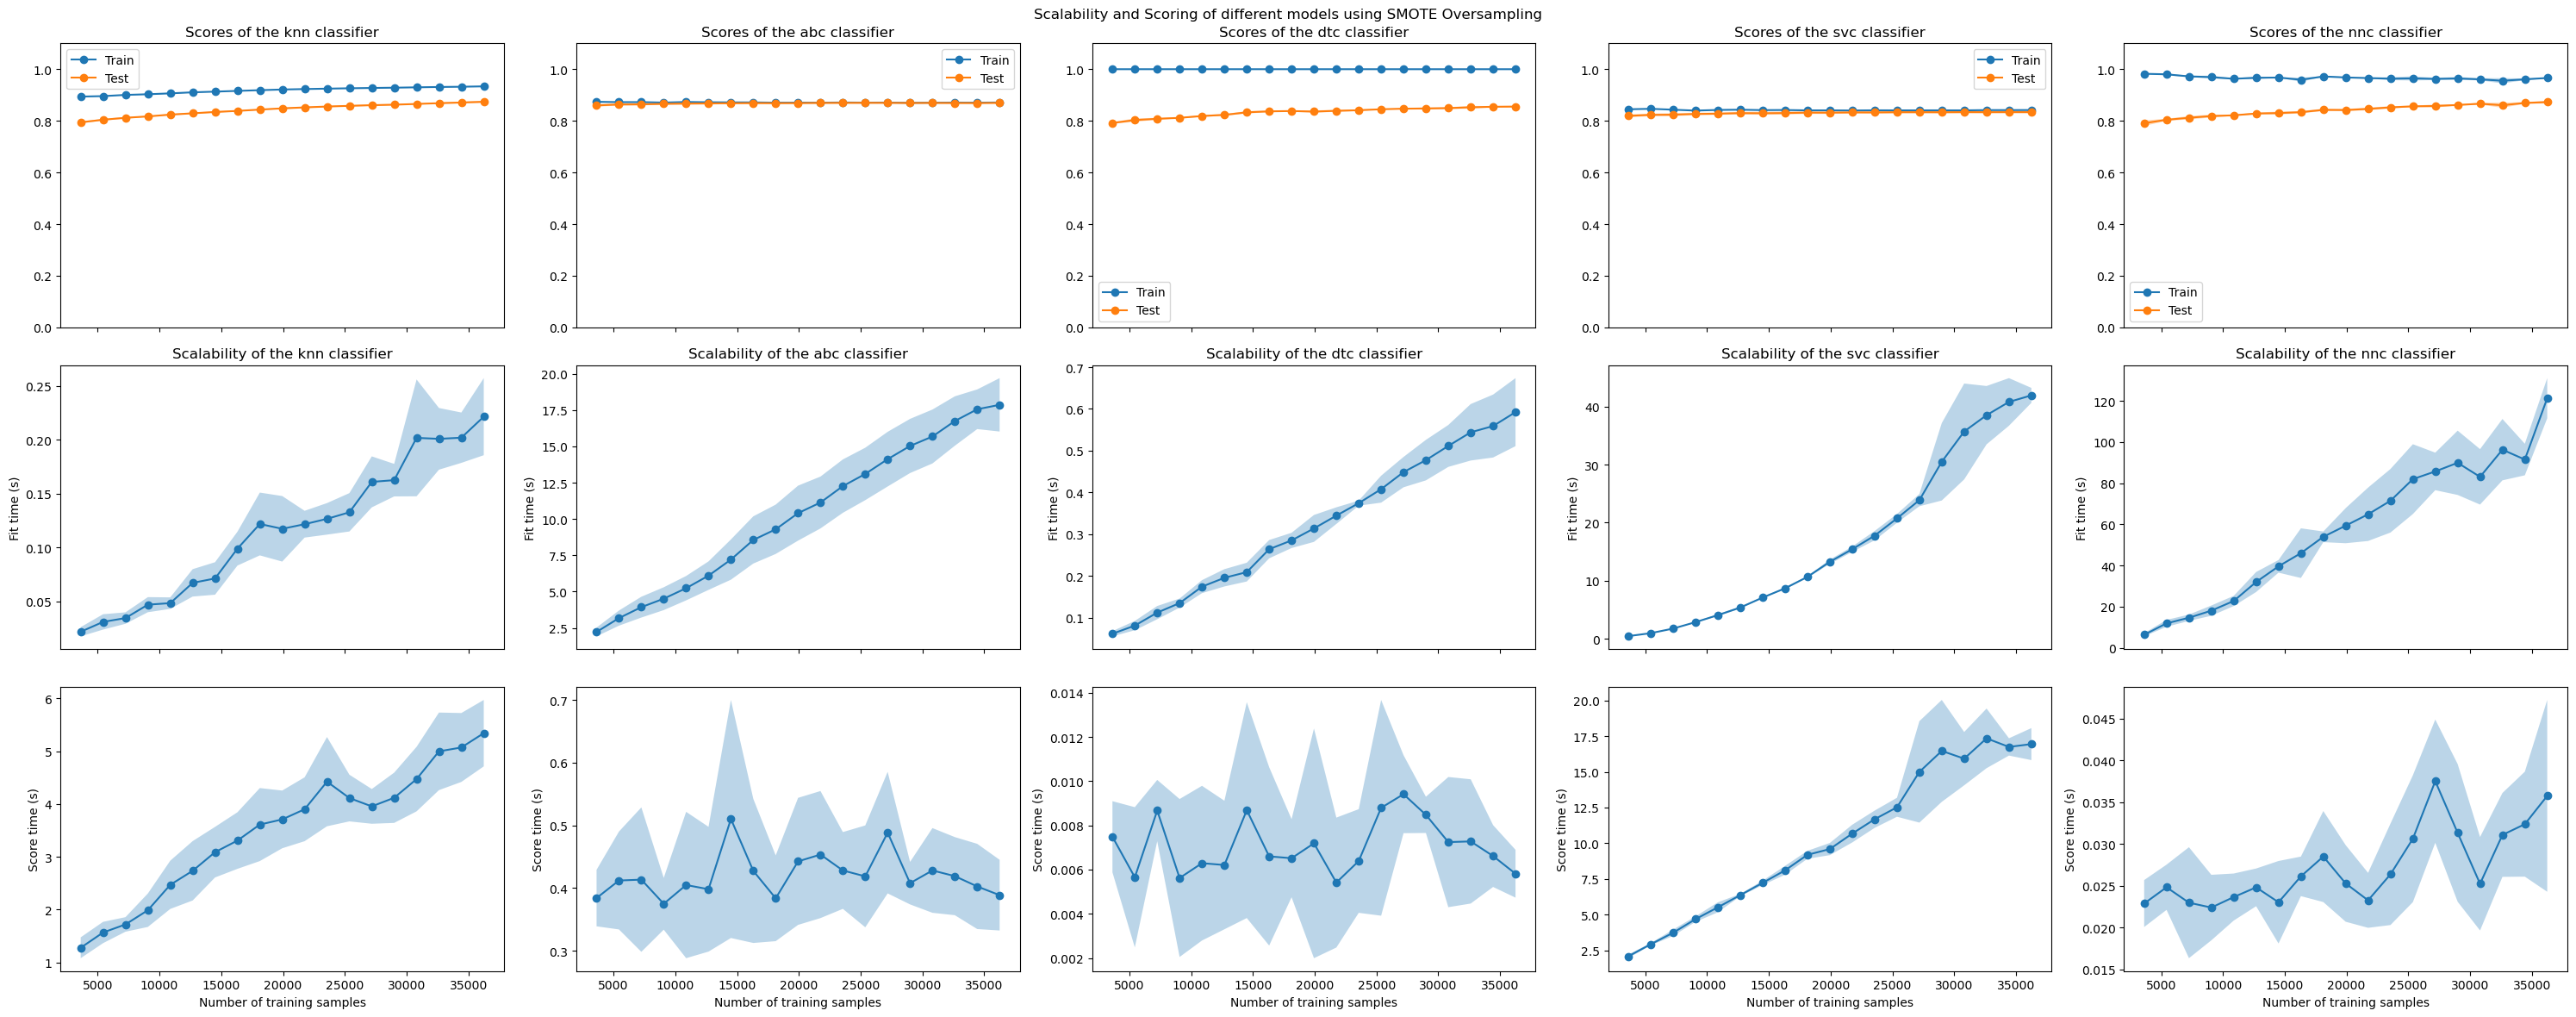

In [146]:
fig, ((ax00,ax01,ax02,ax03, ax04),(ax10,ax11,ax12,ax13, ax14),(ax20,ax21,ax22,ax23, ax24)) = plt.subplots(nrows=3, ncols=5, figsize=(30, 12), sharex=True)
axs = [(ax00,ax01,ax02,ax03),(ax10,ax11,ax12,ax13),(ax20,ax21,ax22,ax23)]
plt.suptitle("Scalability and Scoring of different models using SMOTE Oversampling")

for i, (name, mdic) in enumerate(smodels.items()):
    lc_data = mdic['lc']
    
    axs[0][i].plot(lc_data['train_sizes'], lc_data['train_scores'].mean(axis=1), "o-", label='Train')
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['train_scores'].mean(axis=1) - lc_data['train_scores'].std(axis=1),
        lc_data['train_scores'].mean(axis=1) + lc_data['train_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].plot(lc_data['train_sizes'], lc_data['test_scores'].mean(axis=1), "o-", label='Test')
    axs[0][i].fill_between(
        lc_data['train_sizes'],
        lc_data['test_scores'].mean(axis=1) - lc_data['test_scores'].std(axis=1),
        lc_data['test_scores'].mean(axis=1) + lc_data['test_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0][i].set_title(
        f"Scores of the {name} classifier"
    )
    axs[0][i].legend()
    axs[0][i].set_ylim(0,1.1)

    axs[1][i].plot(lc_data['train_sizes'], lc_data['fit_times'].mean(axis=1), "o-")
    axs[1][i].fill_between(
        lc_data['train_sizes'],
        lc_data['fit_times'].mean(axis=1) - lc_data['fit_times'].std(axis=1),
        lc_data['fit_times'].mean(axis=1) + lc_data['fit_times'].std(axis=1),
        alpha=0.3,
    )
    axs[1][i].set_ylabel("Fit time (s)")
    axs[1][i].set_title(
        f"Scalability of the {name} classifier"
    )

    axs[2][i].plot(lc_data["train_sizes"], lc_data["score_times"].mean(axis=1), "o-")
    axs[2][i].fill_between(
        lc_data["train_sizes"],
        lc_data["score_times"].mean(axis=1) - lc_data["score_times"].std(axis=1),
        lc_data["score_times"].mean(axis=1) + lc_data["score_times"].std(axis=1),
        alpha=0.3,
    )
    axs[2][i].set_ylabel("Score time (s)")
    axs[2][i].set_xlabel("Number of training samples")

axs = [(ax04),(ax14),(ax24)]

for i, m in enumerate([list(nns_model.items())[0]]):
    name = m[0]
    mdic = m[1]
    lc_data = mdic['lc']
    
    axs[0].plot(lc_data['train_sizes'], lc_data['train_scores'].mean(axis=1), "o-", label='Train')
    axs[0].fill_between(
        lc_data['train_sizes'],
        lc_data['train_scores'].mean(axis=1) - lc_data['train_scores'].std(axis=1),
        lc_data['train_scores'].mean(axis=1) + lc_data['train_scores'].std(axis=1),
        alpha=0.3,
    )
    axs[0].plot(lc_data['train_sizes'], lc_data['test_scores'].mean(axis=1), "o-", label='Test')
    axs[0].fill_between(
        lc_data['train_sizes'],
        lc_data['test_scores'].mean(axis=1) - lc_data['test_scores'].std(axis=1),
        lc_data['test_scores'].mean(axis=1) + lc_data['test_scores'].std(axis=1),
        alpha=0.3,
    )
    
    axs[0].set_title(
        f"Scores of the {name} classifier"
    )
    axs[0].legend()
    axs[0].set_ylim(0,1.1)

    axs[1].plot(lc_data['train_sizes'], lc_data['fit_times'].mean(axis=1), "o-")
    axs[1].fill_between(
        lc_data['train_sizes'],
        lc_data['fit_times'].mean(axis=1) - lc_data['fit_times'].std(axis=1),
        lc_data['fit_times'].mean(axis=1) + lc_data['fit_times'].std(axis=1),
        alpha=0.3,
    )
    axs[1].set_ylabel("Fit time (s)")
    axs[1].set_title(
        f"Scalability of the {name} classifier"
    )

    axs[2].plot(lc_data["train_sizes"], lc_data["score_times"].mean(axis=1), "o-")
    axs[2].fill_between(
        lc_data["train_sizes"],
        lc_data["score_times"].mean(axis=1) - lc_data["score_times"].std(axis=1),
        lc_data["score_times"].mean(axis=1) + lc_data["score_times"].std(axis=1),
        alpha=0.3,
    )
    axs[2].set_ylabel("Score time (s)")
    axs[2].set_xlabel("Number of training samples")

plt.tight_layout()
plt.show()